# I. Import Libraries

Let's start by reading the file to understand its structure and content. This will help in providing an overview of the data you mentioned. I'll read the file and display the first few rows to get a sense of the data.

The dataset contains information on the betting activity of individual customers for specific days. Here's an overview of the columns and their potential meanings:

- `DATE_DIM`: The date of the betting activity.
- `DAY_OF_WEEK`: The day of the week for the betting activity.
- `BET_ACCOUNT_NUM_HASH`: A unique identifier for each customer.
- `AGE`: The age of the customer.
- `AGE_BAND`: The age band or range the customer falls into.
- `GENDER`: The gender of the customer.
- `TENURE_IN_DAYS`: How long the customer has been with the service, in days.
- `RESIDENTIAL_STATE`: The state of residence of the customer.
- `FOB_RACING_TURNOVER`: Turnover from fixed odds betting on racing.
- `FOB_SPORT_TURNOVER`: Turnover from fixed odds betting on sports.
- `PARI_RACING_TURNOVER`: Turnover from pari-mutuel betting on racing.
- `PARI_SPORT_TURNOVER`: Turnover from pari-mutuel betting on sports.
- `TOTAL_TURNOVER`: The total betting turnover for the customer on that day.
- `DIVIDENDS_PAID`: The total dividends paid out to the customer on that day.
- `GROSS_MARGIN`: The gross margin from the customer's betting activity.
- `TICKETS`: The number of betting tickets or bets placed by the customer on that day.

The data seems well-structured for analysis, offering a comprehensive view of daily betting activities alongside demographic information about the customers. This dataset can be used to perform descriptive, diagnostic, predictive, and prescriptive analyses as outlined in your project guidelines, aiming to forecast future turnover based on historical wagering transactions and to optimize strategic decisions for WA TAB.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# II. Import & Overview Dataset

## 2.1 Import Dataset

In [2]:
df_origin = pd.read_csv("TAB_Betting_Data.csv")
df = df_origin.copy()

## 2.2 Overview the Data

In [3]:
df.head()

DATE_DIM DAY_OF_WEEK  BET_ACCOUNT_NUM_HASH   AGE AGE_BAND GENDER  \
0  2021-01-01         Fri                 13154  67.0      65+      M   
1  2021-01-01         Fri                 18379  54.0    45-54      M   
2  2021-01-01         Fri                559232  63.0    55-64      M   
3  2021-01-01         Fri                698904  69.0      65+      M   
4  2021-01-01         Fri                762921  67.0      65+      M   

   TENURE_IN_DAYS RESIDENTIAL_STATE  FOB_RACING_TURNOVER  FOB_SPORT_TURNOVER  \
0           11846                WA                 37.0                 NaN   
1            1884                WA                 40.0                 NaN   
2            2866                WA                  NaN                 NaN   
3            2100                WA                  NaN                 NaN   
4            4766                WA                  NaN                 NaN   

   PARI_RACING_TURNOVER  PARI_SPORT_TURNOVER  TOTAL_TURNOVER  DIVIDENDS_PAID  \
0                1081.0                  NaN          1118.0          443.55   
1                   NaN                  NaN            40.0            0.00   
2                  12.0                  NaN            12.0            9.50   
3                1223.5                  NaN          1223.5          267.91   
4                  17.5                  NaN            17.5            0.00   

   GROSS_MARGIN  TICKETS  
0    271.254275      288  
1     40.000000        1  
2      2.041720        5  
3    245.117147       40  
4      3.504075        5

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12364101 entries, 0 to 12364100
Data columns (total 16 columns):
 #   Column                Dtype  
---  ------                -----  
 0   DATE_DIM              object 
 1   DAY_OF_WEEK           object 
 2   BET_ACCOUNT_NUM_HASH  int64  
 3   AGE                   float64
 4   AGE_BAND              object 
 5   GENDER                object 
 6   TENURE_IN_DAYS        int64  
 7   RESIDENTIAL_STATE     object 
 8   FOB_RACING_TURNOVER   float64
 9   FOB_SPORT_TURNOVER    float64
 10  PARI_RACING_TURNOVER  float64
 11  PARI_SPORT_TURNOVER   float64
 12  TOTAL_TURNOVER        float64
 13  DIVIDENDS_PAID        float64
 14  GROSS_MARGIN          float64
 15  TICKETS               int64  
dtypes: float64(8), int64(3), object(5)
memory usage: 1.5+ GB


In [5]:
df.describe()

BET_ACCOUNT_NUM_HASH           AGE  TENURE_IN_DAYS  \
count          1.236410e+07  1.236142e+07    1.236410e+07   
mean           2.144468e+09  5.314939e+01    3.437851e+03   
std            1.240403e+09  1.536221e+01    3.416204e+03   
min            1.315400e+04  1.800000e+01   -1.000000e+00   
25%            1.067720e+09  4.100000e+01    9.550000e+02   
50%            2.151297e+09  5.400000e+01    2.316000e+03   
75%            3.217306e+09  6.500000e+01    4.708000e+03   
max            4.294965e+09  1.040000e+02    2.132900e+04   

       FOB_RACING_TURNOVER  FOB_SPORT_TURNOVER  PARI_RACING_TURNOVER  \
count         8.576656e+06        1.779580e+06          8.527489e+06   
mean          1.235937e+02        1.278436e+02          1.063339e+02   
std           5.274644e+02        7.873640e+02          3.022158e+02   
min          -1.000000e+03       -5.500000e+02          0.000000e+00   
25%           1.000000e+01        1.000000e+01          1.000000e+01   
50%           3.000000e+01        2.300000e+01          3.000000e+01   
75%           9.000000e+01        7.200000e+01          9.575000e+01   
max           2.267710e+05        1.987243e+05          2.482320e+05   

       PARI_SPORT_TURNOVER  TOTAL_TURNOVER  DIVIDENDS_PAID  GROSS_MARGIN  \
count         15678.000000    1.236410e+07    1.236410e+07  1.236410e+07   
mean             37.800517    1.775206e+02    1.467335e+02  2.771342e+01   
std              91.525587    6.407664e+02    6.863462e+02  2.300061e+02   
min               0.000000   -1.000000e+03   -2.550000e+03 -1.123050e+05   
25%               4.000000    1.600000e+01    0.000000e+00  1.888508e+00   
50%              11.000000    5.000000e+01    1.435000e+01  1.099573e+01   
75%              32.000000    1.450000e+02    9.561000e+01  4.000000e+01   
max            2368.000000    2.648910e+05    4.137750e+05  8.088635e+04   

            TICKETS  
count  1.236410e+07  
mean   2.212268e+01  
std    6.451099e+01  
min    1.000000e+00  
25%    2.000000e+00  
50%    7.000000e+00  
75%    2.000000e+01  
max    1.911400e+04

In [6]:
# Find the range of dates in the DATE_DIM column
date_min = df['DATE_DIM'].min()
date_max = df['DATE_DIM'].max()

date_min, date_max

('2021-01-01', '2022-12-31')

- Data range in 2 years (2021 & 2022)

## 2.3 Checking & Dealing with Null Values

In [7]:
null_values = df.isnull().sum()
null_values

DATE_DIM                       0
DAY_OF_WEEK                    0
BET_ACCOUNT_NUM_HASH           0
AGE                         2676
AGE_BAND                       0
GENDER                         0
TENURE_IN_DAYS                 0
RESIDENTIAL_STATE              0
FOB_RACING_TURNOVER      3787445
FOB_SPORT_TURNOVER      10584521
PARI_RACING_TURNOVER     3836612
PARI_SPORT_TURNOVER     12348423
TOTAL_TURNOVER                 0
DIVIDENDS_PAID                 0
GROSS_MARGIN                   0
TICKETS                        0
dtype: int64

Null Values appear in some column:
- AGE: Since age is an important demographic attribute, we might not want to discard rows with missing ages without further analysis. One approach could be to fill in the missing values with the median age, assuming age is typically a well-behaved attribute with a central tendency.
- Betting Turnover Columns (FOB_RACING_TURNOVER, FOB_SPORT_TURNOVER, PARI_RACING_TURNOVER, PARI_SPORT_TURNOVER): For turnover columns, null values likely indicate that the customer did not place bets in those categories for the day. It would be reasonable to fill these null values with 0, indicating no activity.

In [8]:
df['AGE'].fillna(df['AGE'].median(), inplace=True)

betting_turnover_columns = ['FOB_RACING_TURNOVER', 'FOB_SPORT_TURNOVER', 'PARI_RACING_TURNOVER', 'PARI_SPORT_TURNOVER']
df[betting_turnover_columns] = df[betting_turnover_columns].fillna(0)

In [9]:
def classify_age_band(age):
    if 18 <= age <= 24:
        return "18-24"
    elif 25 <= age <= 34:
        return "25-34"
    elif 35 <= age <= 44:
        return "35-44"
    elif 45 <= age <= 54:
        return "45-54"
    elif 55 <= age <= 64:
        return "55-64"
    else:
        return "65+"

df['AGE_BAND'] = df['AGE'].apply(classify_age_band)

In [10]:
null_values_after = df.isnull().sum()
null_values_after

DATE_DIM                0
DAY_OF_WEEK             0
BET_ACCOUNT_NUM_HASH    0
AGE                     0
AGE_BAND                0
GENDER                  0
TENURE_IN_DAYS          0
RESIDENTIAL_STATE       0
FOB_RACING_TURNOVER     0
FOB_SPORT_TURNOVER      0
PARI_RACING_TURNOVER    0
PARI_SPORT_TURNOVER     0
TOTAL_TURNOVER          0
DIVIDENDS_PAID          0
GROSS_MARGIN            0
TICKETS                 0
dtype: int64

- No null values left

## 2.4 Checking & Dealing with Duplicated Rows

In [11]:
duplicated_rows = df.duplicated().sum()
duplicated_rows

0

- No duplicated rows found in this dataset. Luckily!

## 2.5 Checking Unique Values per Columns

In [12]:
for column in df.columns:
    print(f"Unique values in '{column}':")
    print(df[column].unique())
    print("\n")

Unique values in 'DATE_DIM':
['2021-01-01' '2021-01-02' '2021-01-03' '2021-01-04' '2021-01-05'
 '2021-01-06' '2021-01-07' '2021-01-08' '2021-01-09' '2021-01-10'
 '2021-01-11' '2021-01-12' '2021-01-13' '2021-01-14' '2021-01-15'
 '2021-01-16' '2021-01-17' '2021-01-18' '2021-01-19' '2021-01-20'
 '2021-01-21' '2021-01-22' '2021-01-23' '2021-01-24' '2021-01-25'
 '2021-01-26' '2021-01-27' '2021-01-28' '2021-01-29' '2021-01-30'
 '2021-01-31' '2021-02-01' '2021-02-02' '2021-02-03' '2021-02-04'
 '2021-02-05' '2021-02-06' '2021-02-07' '2021-02-08' '2021-02-09'
 '2021-02-10' '2021-02-11' '2021-02-12' '2021-02-13' '2021-02-14'
 '2021-02-15' '2021-02-16' '2021-02-17' '2021-02-18' '2021-02-19'
 '2021-02-20' '2021-02-21' '2021-02-22' '2021-02-23' '2021-02-24'
 '2021-02-25' '2021-02-26' '2021-02-27' '2021-02-28' '2021-03-01'
 '2021-03-02' '2021-03-03' '2021-03-04' '2021-03-05' '2021-03-06'
 '2021-03-07' '2021-03-08' '2021-03-09' '2021-03-10' '2021-03-11'
 '2021-03-12' '2021-03-13' '2021-03-14' '2021-0

['Fri' 'Sat' 'Sun' 'Mon' 'Tue' 'Wed' 'Thu']


Unique values in 'BET_ACCOUNT_NUM_HASH':
[     13154      18379     559232 ... 4245765385 4289621869 4291211668]


Unique values in 'AGE':
[ 67.  54.  63.  69.  46.  76.  64.  55.  70.  30.  34.  41.  81.  65.
  52.  68.  77.  50.  49.  74.  61.  58.  79.  35.  37.  87.  62.  48.
  71.  38.  39.  28.  72.  36.  32.  21.  43.  60.  47.  80.  29.  40.
  51.  59.  88.  42.  53.  31.  24.  66.  56.  57.  27.  73.  23.  45.
  75.  44.  85.  26.  33.  82.  78.  20.  84.  83.  22.  25.  93.  98.
  86.  90.  89.  91.  92.  96.  19. 104.  97.  95. 102. 101. 100.  94.
 103.  18.]


Unique values in 'AGE_BAND':
['65+' '45-54' '55-64' '25-34' '35-44' '18-24']


Unique values in 'GENDER':
['M' 'F' 'U']


Unique values in 'TENURE_IN_DAYS':
[11846  1884  2866 ... 19155 21329 19999]


Unique values in 'RESIDENTIAL_STATE':
['WA' 'OTH']


Unique values in 'FOB_RACING_TURNOVER':
[   37.    40.     0. ... 19067.  7505. 18950.]


Unique values in 'FOB_SPORT_TUR

In [13]:
day_of_week_mapping = {
    'Fri': 6, 'Sat': 7, 'Sun': 8,
    'Mon': 2, 'Tue': 3, 'Wed': 4, 'Thu': 5
}

df['DAY_OF_WEEK'] = df['DAY_OF_WEEK'].map(day_of_week_mapping)

df.head()

DATE_DIM  DAY_OF_WEEK  BET_ACCOUNT_NUM_HASH   AGE AGE_BAND GENDER  \
0  2021-01-01            6                 13154  67.0      65+      M   
1  2021-01-01            6                 18379  54.0    45-54      M   
2  2021-01-01            6                559232  63.0    55-64      M   
3  2021-01-01            6                698904  69.0      65+      M   
4  2021-01-01            6                762921  67.0      65+      M   

   TENURE_IN_DAYS RESIDENTIAL_STATE  FOB_RACING_TURNOVER  FOB_SPORT_TURNOVER  \
0           11846                WA                 37.0                 0.0   
1            1884                WA                 40.0                 0.0   
2            2866                WA                  0.0                 0.0   
3            2100                WA                  0.0                 0.0   
4            4766                WA                  0.0                 0.0   

   PARI_RACING_TURNOVER  PARI_SPORT_TURNOVER  TOTAL_TURNOVER  DIVIDENDS_PAID  \
0                1081.0                  0.0          1118.0          443.55   
1                   0.0                  0.0            40.0            0.00   
2                  12.0                  0.0            12.0            9.50   
3                1223.5                  0.0          1223.5          267.91   
4                  17.5                  0.0            17.5            0.00   

   GROSS_MARGIN  TICKETS  
0    271.254275      288  
1     40.000000        1  
2      2.041720        5  
3    245.117147       40  
4      3.504075        5

## 2.6 Dealing with Negative Values

In [14]:
specified_columns = [
    'FOB_RACING_TURNOVER', 'FOB_SPORT_TURNOVER', 'PARI_RACING_TURNOVER', 
    'PARI_SPORT_TURNOVER', 'TOTAL_TURNOVER', 'DIVIDENDS_PAID', 'GROSS_MARGIN', 'TICKETS'
]

negative_value_counts_cleaned = {column: (df[column] < 0).sum() for column in specified_columns}

negative_value_counts_cleaned

{'FOB_RACING_TURNOVER': 168,
 'FOB_SPORT_TURNOVER': 107,
 'PARI_RACING_TURNOVER': 0,
 'PARI_SPORT_TURNOVER': 0,
 'TOTAL_TURNOVER': 199,
 'DIVIDENDS_PAID': 247,
 'GROSS_MARGIN': 1929139,
 'TICKETS': 0}

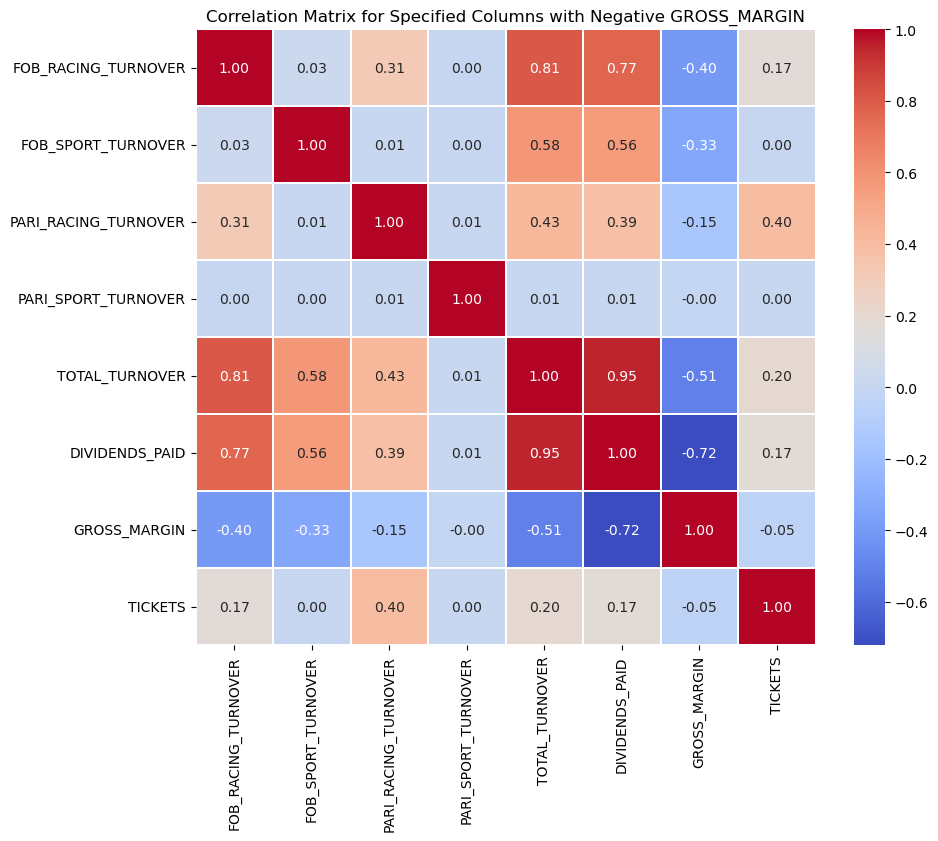

In [15]:
negative_gross_margin_records = df[df['GROSS_MARGIN'] < 0]

specified_columns_for_correlation = [
    'FOB_RACING_TURNOVER', 'FOB_SPORT_TURNOVER', 'PARI_RACING_TURNOVER', 
    'PARI_SPORT_TURNOVER', 'TOTAL_TURNOVER', 'DIVIDENDS_PAID', 'GROSS_MARGIN', 'TICKETS'
]
negative_gross_margin_correlation = negative_gross_margin_records[specified_columns_for_correlation].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(negative_gross_margin_correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.05)
plt.title("Correlation Matrix for Specified Columns with Negative GROSS_MARGIN")
plt.show()

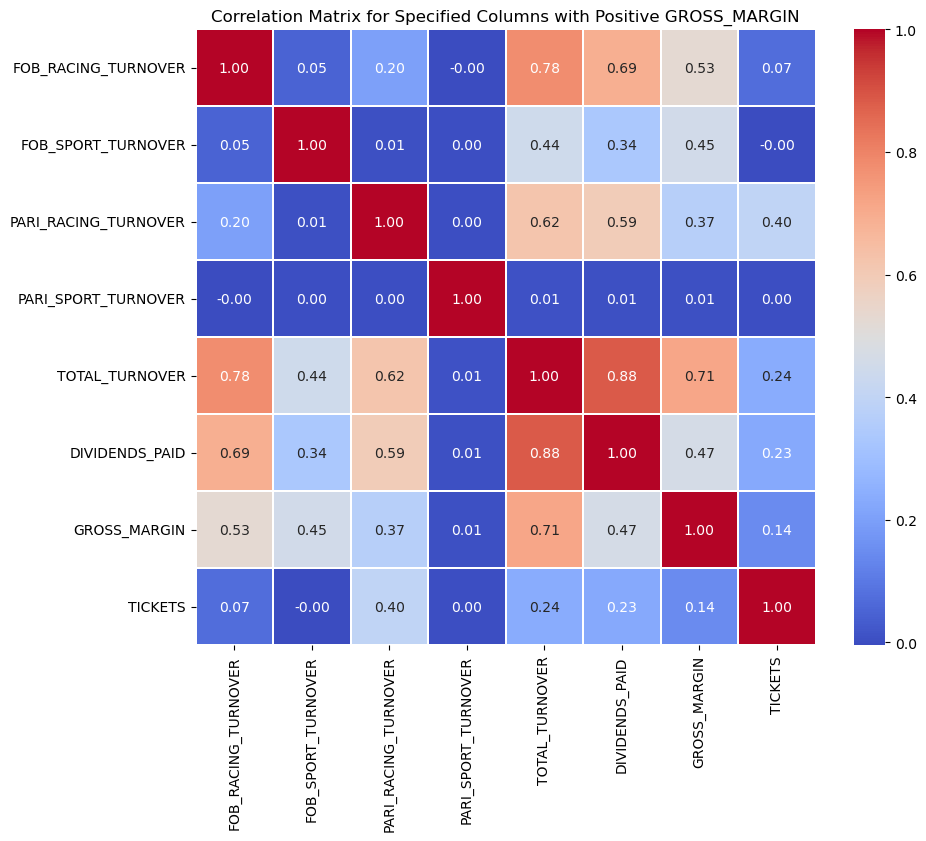

In [16]:
positive_gross_margin_records = df[df['GROSS_MARGIN'] > 0]

specified_columns_for_correlation = [
    'FOB_RACING_TURNOVER', 'FOB_SPORT_TURNOVER', 'PARI_RACING_TURNOVER', 
    'PARI_SPORT_TURNOVER', 'TOTAL_TURNOVER', 'DIVIDENDS_PAID', 'GROSS_MARGIN', 'TICKETS'
]
positive_gross_margin_correlation = positive_gross_margin_records[specified_columns_for_correlation].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(positive_gross_margin_correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.05)
plt.title("Correlation Matrix for Specified Columns with Positive GROSS_MARGIN")
plt.show()

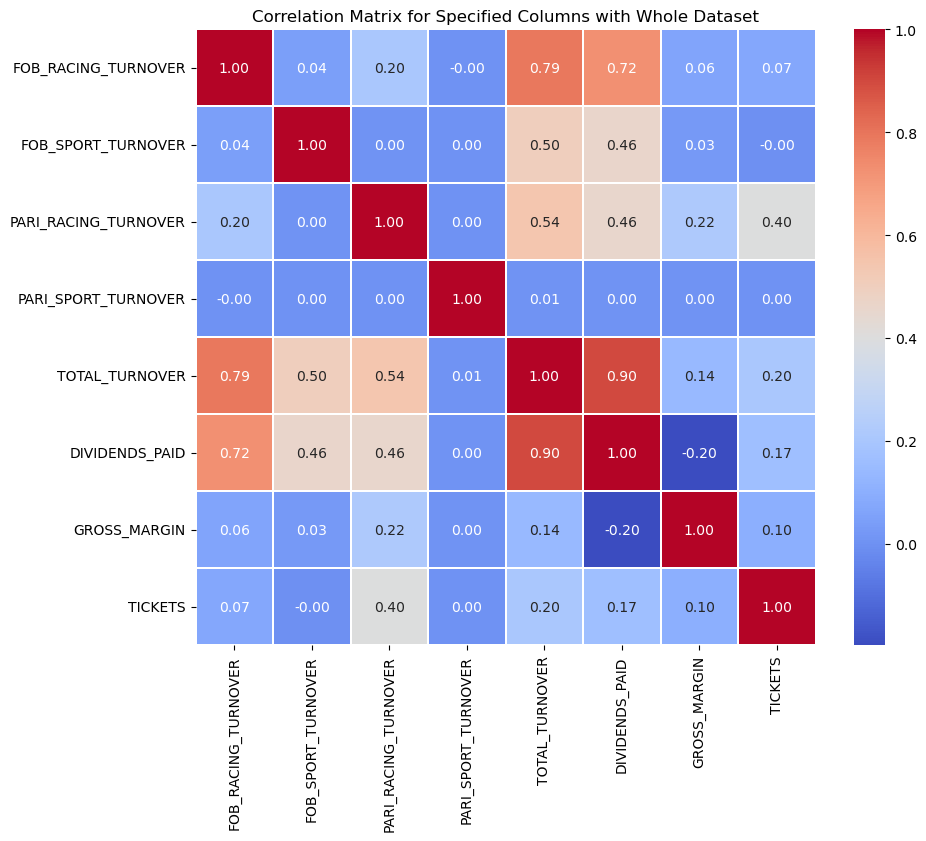

In [17]:
specified_columns_for_correlation = [
    'FOB_RACING_TURNOVER', 'FOB_SPORT_TURNOVER', 'PARI_RACING_TURNOVER', 
    'PARI_SPORT_TURNOVER', 'TOTAL_TURNOVER', 'DIVIDENDS_PAID', 'GROSS_MARGIN', 'TICKETS'
]
df_corr = df[specified_columns_for_correlation].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.05)
plt.title("Correlation Matrix for Specified Columns with Whole Dataset")
plt.show()

Trong biểu đồ ma trận tương quan mới này, chúng ta có thể thấy một số mối liên hệ khác biệt so với ma trận trước đó:

1. **`TOTAL_TURNOVER` và `DIVIDENDS_PAID`**: Sự tương quan mạnh (0.90) giữa tổng doanh thu và số tiền thưởng trả ra vẫn đứng vững, khẳng định rằng khi doanh thu từ cược tăng lên, số tiền thưởng trả cho người chơi cũng tăng theo.

2. **`FOB_RACING_TURNOVER` và `TOTAL_TURNOVER`**: Có một mối tương quan khá mạnh (0.79), cho thấy rằng doanh thu từ cược đua ngựa cố định là một phần quan trọng của tổng doanh thu cược.

3. **`GROSS_MARGIN`**: Không có mối liên hệ mạnh nào giữa `GROSS_MARGIN` và các cột doanh thu cược cụ thể (tất cả đều dưới 0.25), cho thấy rằng các yếu tố khác ngoài doanh thu cược có thể đang ảnh hưởng đến lợi nhuận ròng. Điều này có thể bao gồm cấu trúc chi phí, quản lý rủi ro, hoặc các yếu tố thị trường khác.

4. **`TICKETS`**: Không có mối liên hệ đáng kể giữa số lượng vé (`TICKETS`) và `GROSS_MARGIN` (0.10), gợi ý rằng việc tăng số lượng giao dịch không trực tiếp dẫn đến việc cải thiện lợi nhuận ròng.

5. **Mối liên hệ giữa `FOB_RACING_TURNOVER` và `DIVIDENDS_PAID`**: Mối tương quan dương (0.72) cho thấy rằng số tiền thưởng trả ra có thể bị ảnh hưởng đáng kể bởi doanh thu từ cược đua ngựa cố định.

Dựa trên những phát hiện này, WA TAB có thể cần xem xét việc điều chỉnh chiến lược định giá và quản lý rủi ro của mình, đặc biệt là trong các loại hình cược có tương quan cao với số tiền thưởng trả ra. Điều quan trọng là cần phải cân nhắc đến cả tỷ lệ cược và kỳ vọng của khách hàng để đảm bảo rằng lợi nhuận được tối ưu hóa.

In [18]:
columns_with_potential_negatives = [
    'FOB_RACING_TURNOVER', 'FOB_SPORT_TURNOVER', 'PARI_RACING_TURNOVER',
    'PARI_SPORT_TURNOVER', 'TOTAL_TURNOVER', 'DIVIDENDS_PAID', 'GROSS_MARGIN'
]

condition = (df[columns_with_potential_negatives] < 0).any(axis=1)

negative_value_records = df[condition]

negative_value_records

DATE_DIM  DAY_OF_WEEK  BET_ACCOUNT_NUM_HASH   AGE AGE_BAND GENDER  \
6         2021-01-01            6               1213538  46.0    45-54      M   
7         2021-01-01            6               1225565  76.0      65+      M   
15        2021-01-01            6               3099282  81.0      65+      M   
26        2021-01-01            6               5088323  61.0    55-64      U   
32        2021-01-01            6               5932568  30.0    25-34      M   
...              ...          ...                   ...   ...      ...    ...   
12364078  2022-12-31            7            4290850633  67.0      65+      U   
12364083  2022-12-31            7            4291637614  39.0    35-44      M   
12364090  2022-12-31            7            4292843937  30.0    25-34      M   
12364094  2022-12-31            7            4293602952  46.0    45-54      M   
12364097  2022-12-31            7            4294296954  30.0    25-34      U   

          TENURE_IN_DAYS RESIDENTIAL_STATE  FOB_RACING_TURNOVER  \
6                    714                WA                 56.0   
7                  10686                WA                 10.0   
15                  5182                WA                 35.0   
26                   894                WA                 55.0   
32                  2553                WA                 50.0   
...                  ...               ...                  ...   
12364078            1400               OTH                 14.0   
12364083            6107                WA                605.0   
12364090            1667                WA                106.0   
12364094            3816                WA                342.0   
12364097              14               OTH                450.0   

          FOB_SPORT_TURNOVER  PARI_RACING_TURNOVER  PARI_SPORT_TURNOVER  \
6                       68.0                  10.0                  0.0   
7                        0.0                   0.0                  0.0   
15                       0.0                 119.4                  0.0   
26                       0.0                   0.0                  0.0   
32                       0.0                   0.0                  0.0   
...                      ...                   ...                  ...   
12364078                 0.0                   0.0                  0.0   
12364083                 0.0                 117.5                  0.0   
12364090                 0.0                   0.0                  0.0   
12364094                 0.0                 122.5                  0.0   
12364097                 0.0                   0.0                  0.0   

          TOTAL_TURNOVER  DIVIDENDS_PAID  GROSS_MARGIN  TICKETS  
6                  134.0          149.00    -23.279175       12  
7                   10.0           35.00    -25.000000        1  
15                 154.4          279.31    -98.807931       18  
26                  55.0           84.00    -29.000000        2  
32                  50.0           60.00    -10.000000        1  
...                  ...             ...           ...      ...  
12364078            14.0           20.00     -6.000000        7  
12364083           722.5          780.10    -35.704346       77  
12364090           106.0          132.00    -26.000000        9  
12364094           464.5          486.15    -58.899433       34  
12364097           450.0          475.00    -25.000000        9  

[1929430 rows x 16 columns]

- Nhận xét chung của mấy cái giá trị âm này là giá trị trung bình không lớn, độ lệch của các giá trị cũng cao nữa. Chúng ta có nhiều cách để giải quyết:
    - Loại bỏ: Loại bỏ hoàn toàn thì ít nhiều sẽ ảnh hưởng ít đến kết quả cuối. Và nó cũng chỉ chiếm số ít cọ thể 1xx trong 12tr dòng. 
    - Thay đổi: 
        - Nếu bạn quyết định xử lý các giá trị âm trong cột `FOB_SPORT_TURNOVER` thay vì loại bỏ chúng hoàn toàn, có một số phương pháp bạn có thể xem xét:

        ### 1. Thiết Lập Lại Giá Trị Bằng 0
        Giả định rằng các giá trị âm không phản ánh chính xác hoạt động cược và có thể được xem là không có hoạt động, bạn có thể thiết lập lại chúng thành 0.

        ```python
        data.loc[data['FOB_SPORT_TURNOVER'] < 0, 'FOB_SPORT_TURNOVER'] = 0
        ```

        ### 2. Chuyển Đổi Sang Giá Trị Tuyệt Đối
        Nếu giả định rằng giá trị tuyệt đối của các số liệu âm có ý nghĩa trong một bối cảnh nào đó (ví dụ, biểu thị giá trị hoàn tiền), bạn có thể chuyển đổi chúng sang giá trị tuyệt đối.

        ```python
        data['FOB_SPORT_TURNOVER'] = data['FOB_SPORT_TURNOVER'].abs()
        ```

        ### 3. Sử Dụng Giá Trị Trung Bình hoặc Trung Vị
        Nếu giá trị âm được coi là ngoại lệ, bạn có thể thay thế chúng bằng giá trị trung bình hoặc trung vị của cột. Điều này giúp giữ dữ liệu ổn định mà không bị ảnh hưởng bởi ngoại lệ.

        ```python
        mean_value = data['FOB_SPORT_TURNOVER'][data['FOB_SPORT_TURNOVER'] >= 0].mean()
        data.loc[data['FOB_SPORT_TURNOVER'] < 0, 'FOB_SPORT_TURNOVER'] = mean_value
        ```

        hoặc

        ```python
        median_value = data['FOB_SPORT_TURNOVER'][data['FOB_SPORT_TURNOVER'] >= 0].median()
        data.loc[data['FOB_SPORT_TURNOVER'] < 0, 'FOB_SPORT_TURNOVER'] = median_value
        ```
---------------------------
- Dựa vào cá nhân, cảm nhận và kinh nghiệm thì mình sẽ loại bỏ hoàn toàn, và coi đây là các giá trị ngoại lai.

In [19]:
shape_before = df.shape

condition = (
    (df['FOB_SPORT_TURNOVER'] >= 0) &
    (df['FOB_RACING_TURNOVER'] >= 0) &
    (df['TOTAL_TURNOVER'] >= 0) &
    (df['DIVIDENDS_PAID'] >= 0)
)

df = df[condition]
shape_after = df.shape

shape_before, shape_after

((12364101, 16), (12363655, 16))

In [20]:
rows_removed = shape_before[0]-shape_after[0]
rows_removed

446

## 2.7 Dealing with Time Features

In [21]:
df['DATE_DIM'] = pd.to_datetime(df['DATE_DIM'])
df['Week'] = df['DATE_DIM'].dt.isocalendar().week
df['Month'] = df['DATE_DIM'].dt.month
df['Year'] = df['DATE_DIM'].dt.year
df['DATE_DIM'] = df['DATE_DIM'].dt.date
df['DATE_DIM'].dtype

df.head()

DATE_DIM  DAY_OF_WEEK  BET_ACCOUNT_NUM_HASH   AGE AGE_BAND GENDER  \
0  2021-01-01            6                 13154  67.0      65+      M   
1  2021-01-01            6                 18379  54.0    45-54      M   
2  2021-01-01            6                559232  63.0    55-64      M   
3  2021-01-01            6                698904  69.0      65+      M   
4  2021-01-01            6                762921  67.0      65+      M   

   TENURE_IN_DAYS RESIDENTIAL_STATE  FOB_RACING_TURNOVER  FOB_SPORT_TURNOVER  \
0           11846                WA                 37.0                 0.0   
1            1884                WA                 40.0                 0.0   
2            2866                WA                  0.0                 0.0   
3            2100                WA                  0.0                 0.0   
4            4766                WA                  0.0                 0.0   

   PARI_RACING_TURNOVER  PARI_SPORT_TURNOVER  TOTAL_TURNOVER  DIVIDENDS_PAID  \
0                1081.0                  0.0          1118.0          443.55   
1                   0.0                  0.0            40.0            0.00   
2                  12.0                  0.0            12.0            9.50   
3                1223.5                  0.0          1223.5          267.91   
4                  17.5                  0.0            17.5            0.00   

   GROSS_MARGIN  TICKETS  Week  Month  Year  
0    271.254275      288    53      1  2021  
1     40.000000        1    53      1  2021  
2      2.041720        5    53      1  2021  
3    245.117147       40    53      1  2021  
4      3.504075        5    53      1  2021

In [22]:
df['DATE_DIM'] = pd.to_datetime(df['DATE_DIM'])
df['COHORT'] = df.groupby('BET_ACCOUNT_NUM_HASH')['DATE_DIM'].transform('min').dt.to_period('M')
df['PERIOD'] = (df['DATE_DIM'].dt.to_period('M') - df['COHORT']).apply(lambda r: r.n)
cohort_pivot = df.pivot_table(index='COHORT', 
                                columns='PERIOD', 
                                values='BET_ACCOUNT_NUM_HASH', 
                                aggfunc=pd.Series.nunique)
cohort_sizes = cohort_pivot.loc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_sizes, axis=0)

retention_overall = retention_matrix.mean().to_frame().T

retention_overall.index = ['Overall']

retention_matrix_with_overall = pd.concat([retention_matrix, retention_overall])

retention_matrix_with_overall

PERIOD    0         1         2         3         4         5         6   \
2021-01  1.0  0.818558  0.797832  0.778810  0.755799  0.726611  0.726255   
2021-02  1.0  0.571120  0.504385  0.448074  0.430151  0.430787  0.408542   
2021-03  1.0  0.554738  0.457622  0.385079  0.383608  0.375515  0.403914   
2021-04  1.0  0.512821  0.395945  0.381833  0.354800  0.394355  0.351222   
2021-05  1.0  0.480202  0.405549  0.363682  0.395965  0.338209  0.462547   
2021-06  1.0  0.516992  0.369624  0.374737  0.333534  0.431278  0.250226   
2021-07  1.0  0.469658  0.402346  0.344977  0.418919  0.255482  0.251657   
2021-08  1.0  0.522432  0.395319  0.459688  0.285111  0.262029  0.226918   
2021-09  1.0  0.457578  0.498232  0.238842  0.227574  0.193106  0.208794   
2021-10  1.0  0.669216  0.322419  0.297801  0.252151  0.256931  0.256692   
2021-11  1.0  0.169919  0.151889  0.118170  0.117546  0.121293  0.107477   
2021-12  1.0  0.521415  0.387337  0.348231  0.326505  0.285537  0.262570   
2022-01  1.0  0.482480  0.408086  0.366577  0.307817  0.283558  0.283019   
2022-02  1.0  0.547523  0.426372  0.368139  0.323293  0.295181  0.275100   
2022-03  1.0  0.587209  0.428779  0.369671  0.341570  0.326066  0.328488   
2022-04  1.0  0.519297  0.395213  0.355154  0.328774  0.321935  0.326331   
2022-05  1.0  0.525395  0.400677  0.335214  0.341422  0.362867  0.413657   
2022-06  1.0  0.523407  0.385787  0.346870  0.343486  0.419064  0.309081   
2022-07  1.0  0.501006  0.421026  0.371227  0.400402  0.311368       NaN   
2022-08  1.0  0.558295  0.438624  0.464818  0.355932       NaN       NaN   
2022-09  1.0  0.512025  0.486424  0.322731       NaN       NaN       NaN   
2022-10  1.0  0.617520  0.375095       NaN       NaN       NaN       NaN   
2022-11  1.0  0.424653       NaN       NaN       NaN       NaN       NaN   
2022-12  1.0       NaN       NaN       NaN       NaN       NaN       NaN   
Overall  1.0  0.524498  0.420663  0.373349  0.351218  0.336377  0.325138   

PERIOD         7         8         9   ...        14        15        16  \
2021-01  0.716463  0.738518  0.737732  ...  0.666080  0.670386  0.643519   
2021-02  0.447184  0.436761  0.554341  ...  0.381975  0.350324  0.335833   
2021-03  0.357416  0.482343  0.278105  ...  0.302531  0.286639  0.289876   
2021-04  0.476446  0.270722  0.275293  ...  0.269728  0.277678  0.260783   
2021-05  0.256999  0.258008  0.235057  ...  0.263556  0.246658  0.284489   
2021-06  0.244211  0.220150  0.233383  ...  0.218647  0.252932  0.267368   
2021-07  0.227690  0.226925  0.247068  ...  0.254207  0.248343  0.338858   
2021-08  0.245449  0.247074  0.226268  ...  0.263979  0.356632  0.227568   
2021-09  0.219399  0.198851  0.189571  ...  0.363897  0.191118       NaN   
2021-10  0.226099  0.222992  0.211998  ...  0.238050       NaN       NaN   
2021-11  0.102716  0.106619  0.097331  ...       NaN       NaN       NaN   
2021-12  0.256363  0.256363  0.260087  ...       NaN       NaN       NaN   
2022-01  0.266307  0.269542  0.308356  ...       NaN       NaN       NaN   
2022-02  0.287818  0.316600  0.362784  ...       NaN       NaN       NaN   
2022-03  0.344477  0.380814  0.294089  ...       NaN       NaN       NaN   
2022-04  0.383488  0.268686       NaN  ...       NaN       NaN       NaN   
2022-05  0.295711       NaN       NaN  ...       NaN       NaN       NaN   
2022-06       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2022-07       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2022-08       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2022-09       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2022-10       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2022-11       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2022-12       NaN       NaN       NaN  ...       NaN       NaN       NaN   
Overall  0.314955  0.306310  0.300764  ...  0.322265  0.320079  0.331037   

PERIOD         17        18        19        2

# Anh Thànhhhhhhhhh từ đây đến hết 2.7 Là được nhan anh. Ghép cho em một mục là Phân tích Cohort và tính CLV thôi ạ P

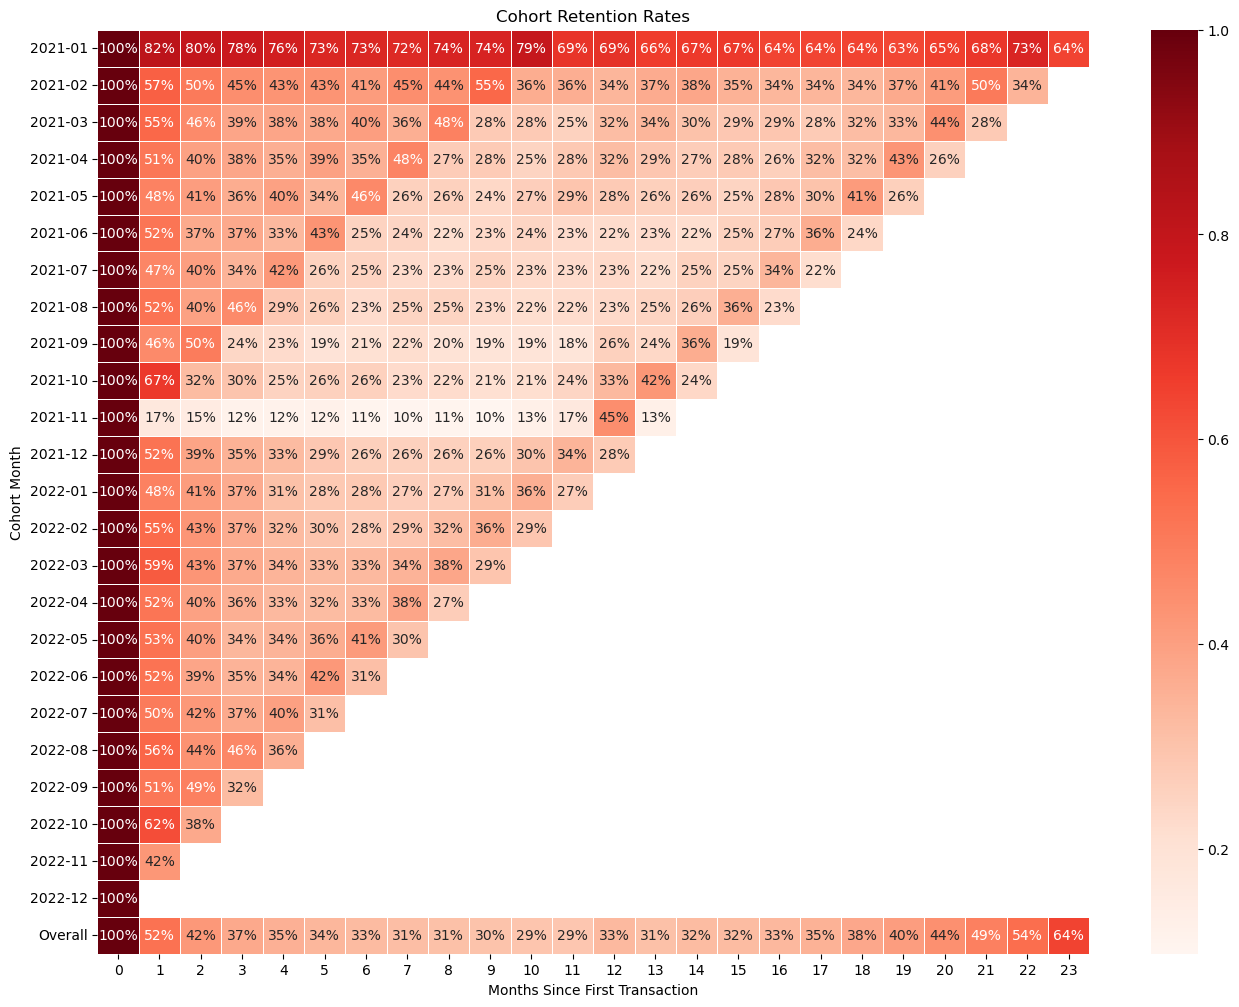

In [23]:
plt.figure(figsize=(16, 12))
sns.heatmap(retention_matrix_with_overall, annot=True, fmt='.0%', cmap='Reds', linewidths=.5)

plt.title('Cohort Retention Rates')
plt.ylabel('Cohort Month')
plt.xlabel('Months Since First Transaction')

plt.show()

In [24]:
activity_counts = df.groupby(['BET_ACCOUNT_NUM_HASH', 'DAY_OF_WEEK']).size().reset_index(name='ACTIVITY_COUNT')

max_activity_day = activity_counts.sort_values(by=['BET_ACCOUNT_NUM_HASH', 'ACTIVITY_COUNT'], ascending=[True, False])
max_activity_day = max_activity_day.drop_duplicates(subset=['BET_ACCOUNT_NUM_HASH']).drop(columns=['ACTIVITY_COUNT'])

max_activity_day.head()

df_with_active_day = pd.merge(df, max_activity_day, on=['BET_ACCOUNT_NUM_HASH', 'DAY_OF_WEEK'], how='inner')

grouped_active_day_df = df_with_active_day.groupby(['BET_ACCOUNT_NUM_HASH', 'DAY_OF_WEEK']).agg(
    TOTAL_FOB_RACING_TURNOVER=('FOB_RACING_TURNOVER', 'sum'),
    TOTAL_FOB_SPORT_TURNOVER=('FOB_SPORT_TURNOVER', 'sum'),
    TOTAL_PARI_RACING_TURNOVER=('PARI_RACING_TURNOVER', 'sum'),
    TOTAL_PARI_SPORT_TURNOVER=('PARI_SPORT_TURNOVER', 'sum'),
    TOTAL_TICKETS=('TICKETS', 'sum')
).reset_index()

grouped_active_day_df.head()

BET_ACCOUNT_NUM_HASH  DAY_OF_WEEK  TOTAL_FOB_RACING_TURNOVER  \
0                 13154            4                     4188.0   
1                 18379            7                    20689.0   
2                 37251            3                       65.0   
3                129273            7                       25.0   
4                348318            6                       14.0   

   TOTAL_FOB_SPORT_TURNOVER  TOTAL_PARI_RACING_TURNOVER  \
0                       0.0                    55828.18   
1                       0.0                     2295.00   
2                       0.0                       35.00   
3                      40.0                        0.00   
4                       0.0                        1.00   

   TOTAL_PARI_SPORT_TURNOVER  TOTAL_TICKETS  
0                        0.0          20530  
1                        0.0            560  
2                        0.0              7  
3                        0.0             15  
4                        0.0             11

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

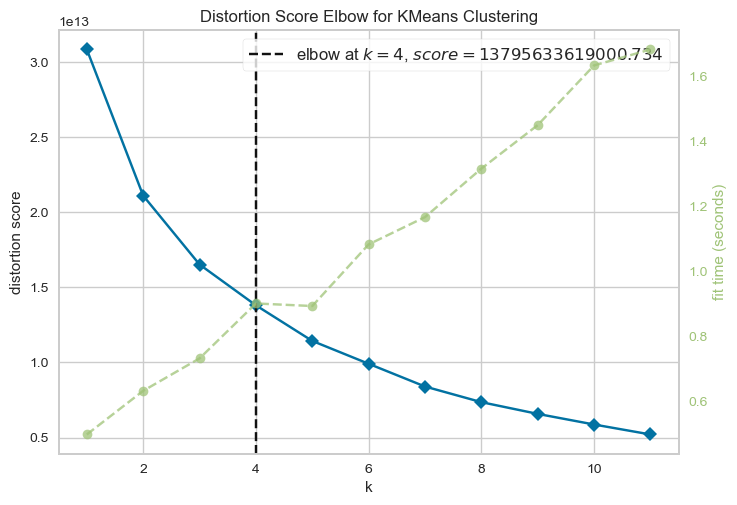

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
data = grouped_active_day_df.loc[:, ['DAY_OF_WEEK', 'TOTAL_FOB_RACING_TURNOVER', 'TOTAL_FOB_SPORT_TURNOVER', 'TOTAL_PARI_RACING_TURNOVER', 'TOTAL_PARI_SPORT_TURNOVER', 'TOTAL_TICKETS']]
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 12))
visualizer.fit(data)  
visualizer.show()

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'The Number of Members in Each Cluster')

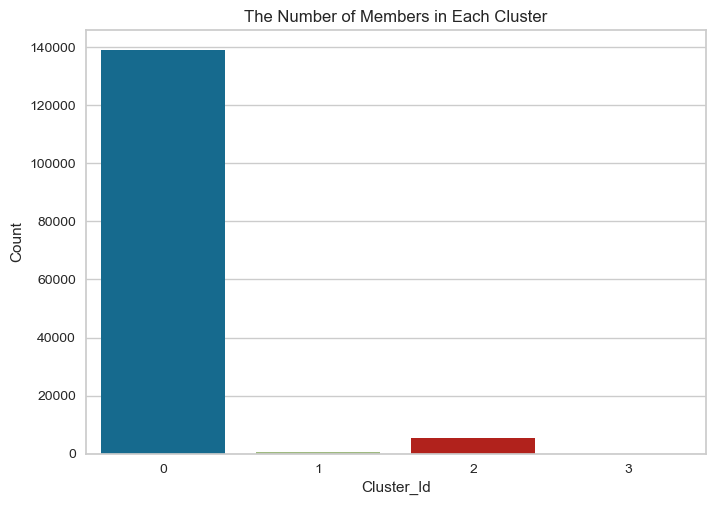

In [26]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(data)

grouped_active_day_df['Cluster_Id'] = model.labels_

sns.countplot(x='Cluster_Id', data=grouped_active_day_df)
plt.ylabel("Count")
plt.title("The Number of Members in Each Cluster")

In [27]:
result = grouped_active_day_df.groupby('Cluster_Id').agg({
    'TOTAL_FOB_RACING_TURNOVER': ['mean', 'min', 'max', 'count'],
    'TOTAL_FOB_SPORT_TURNOVER': ['mean', 'min', 'max', 'count'],
    'TOTAL_PARI_RACING_TURNOVER': ['mean', 'min', 'max', 'count'],
    'TOTAL_PARI_SPORT_TURNOVER': ['mean', 'min', 'max', 'count'],
    'TOTAL_TICKETS': ['mean', 'min', 'max', 'count']
})
result

TOTAL_FOB_RACING_TURNOVER                               \
                                mean       min        max   count   
Cluster_Id                                                          
0                        1193.204523       0.0    26526.0  138990   
1                      115006.655440   65523.0   370731.0     568   
2                       22203.248578       0.0    68523.0    5302   
3                      687327.000000  411150.0  1545599.0       9   

           TOTAL_FOB_SPORT_TURNOVER                          \
                               mean  min        max   count   
Cluster_Id                                                    
0                        292.056337  0.0  359960.26  138990   
1                       4794.463257  0.0  532049.29     568   
2                       1545.656494  0.0  585672.55    5302   
3                      16593.886667  0.0  104220.00       9   

           TOTAL_PARI_RACING_TURNOVER                          \
                                 mean  min        max   count   
Cluster_Id                                                      
0                          834.751171  0.0   23050.08  138990   
1                        24498.159190  0.0  621678.00     568   
2                        24601.685785  0.0  336020.00    5302   
3                        13464.666667  0.0   99934.00       9   

           TOTAL_PARI_SPORT_TURNOVER                       TOTAL_TICKETS       \
                                mean  min      max   count          mean  min   
Cluster_Id                                                                      
0                           0.735823  0.0  18627.0  138990    341.279984    1   
1                           0.059859  0.0     34.0     568   3103.035211   35   
2                           3.059129  0.0  14624.0    5302   5090.693889   35   
3                           0.000000  0.0      0.0       9   2234.555556  973   

                            
               max   count  
Cluster_Id                  
0            28407  138990  
1            28207     568  
2           113400    5302  
3             4632       9

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


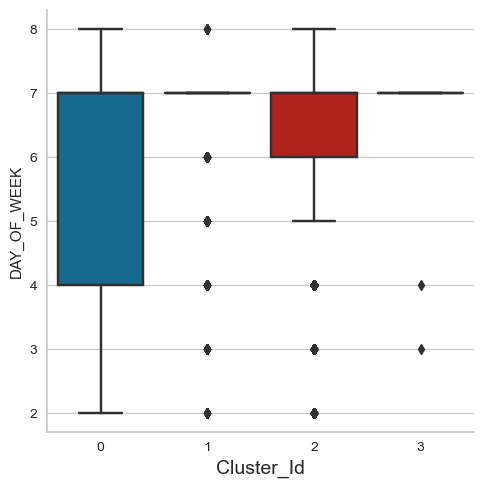

In [28]:
sns.catplot(y='DAY_OF_WEEK', data=grouped_active_day_df, x='Cluster_Id', kind='box')
plt.xlabel(xlabel='Cluster_Id', fontdict={'fontsize': 14})
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


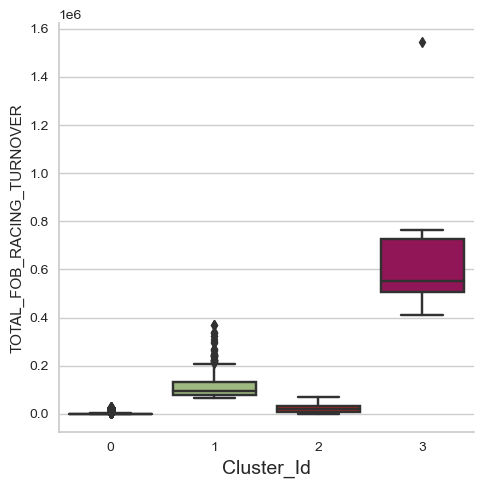

In [29]:
sns.catplot(y='TOTAL_FOB_RACING_TURNOVER', data=grouped_active_day_df, x='Cluster_Id', kind='box')
plt.xlabel(xlabel='Cluster_Id', fontdict={'fontsize': 14})
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


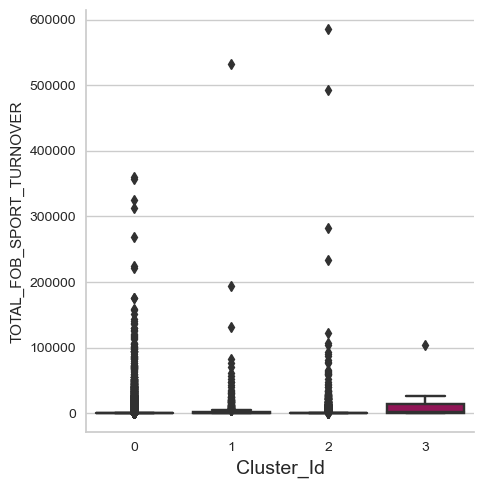

In [30]:
sns.catplot(y='TOTAL_FOB_SPORT_TURNOVER', data=grouped_active_day_df, x='Cluster_Id', kind='box')
plt.xlabel(xlabel='Cluster_Id', fontdict={'fontsize': 14})
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


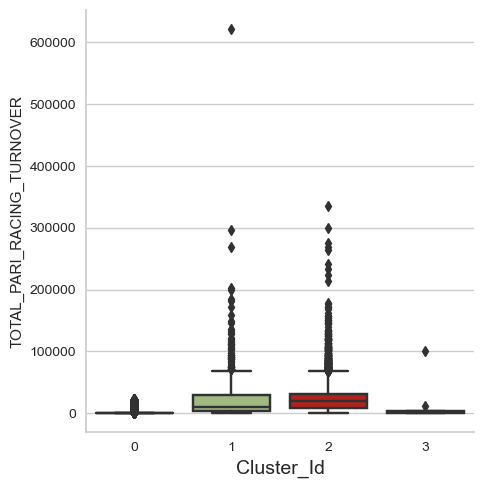

In [31]:
sns.catplot(y='TOTAL_PARI_RACING_TURNOVER', data=grouped_active_day_df, x='Cluster_Id', kind='box')
plt.xlabel(xlabel='Cluster_Id', fontdict={'fontsize': 14})
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


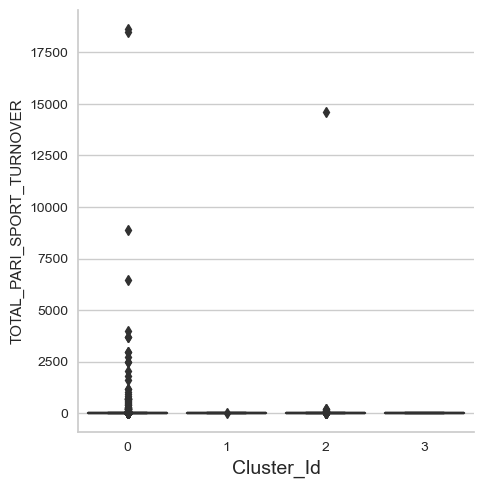

In [32]:
sns.catplot(y='TOTAL_PARI_SPORT_TURNOVER', data=grouped_active_day_df, x='Cluster_Id', kind='box')
plt.xlabel(xlabel='Cluster_Id', fontdict={'fontsize': 14})
plt.show()

In [33]:
customers_in_cluster_4 = grouped_active_day_df.loc[grouped_active_day_df['Cluster_Id'] == 3]
customer_ids_in_cluster_4 = customers_in_cluster_4['BET_ACCOUNT_NUM_HASH'].values

print(customer_ids_in_cluster_4)

[ 414104496  873991516 1562672387 1698096372 2701837473 2728740341
 2889453684 3030857738 4123153528]


In [34]:
customer_df = pd.DataFrame({'BET_ACCOUNT_NUM_HASH': customer_ids_in_cluster_4})

customer_df['COHORT'] = customer_df['BET_ACCOUNT_NUM_HASH'].map(df.groupby('BET_ACCOUNT_NUM_HASH')['COHORT'].first())

cohort_period_data = pd.merge(customer_df, df, on=['BET_ACCOUNT_NUM_HASH', 'COHORT'], how='left')[['BET_ACCOUNT_NUM_HASH', 'COHORT', 'PERIOD']]

cohort_period_pivot = cohort_period_data.pivot_table(index='COHORT', 
                                                      columns='PERIOD', 
                                                      values='BET_ACCOUNT_NUM_HASH', 
                                                      aggfunc=pd.Series.nunique, fill_value=0)

cohort_sizes = cohort_period_pivot.loc[:, 0]
retention_matrix = cohort_period_pivot.divide(cohort_sizes, axis=0)

cohort_period_pivot

PERIOD   0   1   2   3   4   5   6   7   8   9   ...  14  15  16  17  18  19  \
COHORT                                           ...                           
2021-01   8   8   8   8   8   8   8   8   8   8  ...   8   8   8   8   8   8   
2021-04   1   1   1   1   1   1   1   1   1   1  ...   0   0   0   0   0   0   

PERIOD   20  21  22  23  
COHORT                   
2021-01   8   8   8   8  
2021-04   0   0   0   0  

[2 rows x 24 columns]

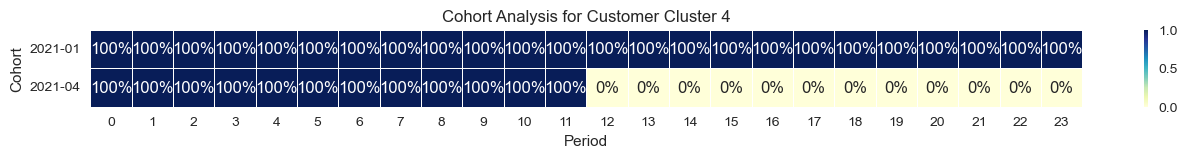

In [35]:
plt.figure(figsize=(16, 1))
sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap='YlGnBu', linewidths=.5)
plt.title('Cohort Analysis for Customer Cluster 4')
plt.xlabel('Period')
plt.ylabel('Cohort')
plt.show()

In [36]:
data_2021 = df[(df['DATE_DIM'].dt.year == 2021)]
data_2021_counts = data_2021['BET_ACCOUNT_NUM_HASH'].value_counts().size

data_2022 = df[(df['DATE_DIM'].dt.year == 2022)]
data_2022_counts = data_2022['BET_ACCOUNT_NUM_HASH'].value_counts().size

data_2021_counts, data_2022_counts

(110526, 116488)

In [37]:
unique_customers_2021 = set(data_2021['BET_ACCOUNT_NUM_HASH'].unique())

unique_customers_2022 = set(data_2022['BET_ACCOUNT_NUM_HASH'].unique())

churn_customers = unique_customers_2021.difference(unique_customers_2022)

churn_customers_count = len(churn_customers)

churn_customers_count

28381

In [38]:
churn_rate = churn_customers_count / ((data_2021_counts + data_2022_counts) / 2)
churn_rate

0.2500374426246839

In [39]:
customer_aggregates = df.groupby('BET_ACCOUNT_NUM_HASH').agg({'GROSS_MARGIN': 'sum'}).reset_index()

customer_aggregates['HISTORICAL_CLV'] = customer_aggregates['GROSS_MARGIN'] * (1 / churn_rate)

customer_aggregates[['BET_ACCOUNT_NUM_HASH', 'HISTORICAL_CLV']].head()

BET_ACCOUNT_NUM_HASH  HISTORICAL_CLV
0                 13154   327654.789045
1                 18379    26578.953870
2                 37251    -2758.206008
3                129273       22.196676
4                348318      110.310402

In [40]:
customers = customer_aggregates[(customer_aggregates['HISTORICAL_CLV'] < 0)]
customers_counts = customers['BET_ACCOUNT_NUM_HASH'].value_counts().size

all_customers_counts = customer_aggregates['BET_ACCOUNT_NUM_HASH'].value_counts().size

negative_clv_sum = customer_aggregates[customer_aggregates['HISTORICAL_CLV'] < 0]['HISTORICAL_CLV'].sum()

revenue = customer_aggregates['HISTORICAL_CLV'].sum()

print(f'Có {customers_counts}/{all_customers_counts} người chơi thắng cược')
print('Doanh nghiệp lỗ:', negative_clv_sum)
print('Doanh thu:', revenue)

Có 20890/144869 người chơi thắng cược
Doanh nghiệp lỗ: -81962626.33224833
Doanh thu: 1370293106.3355846


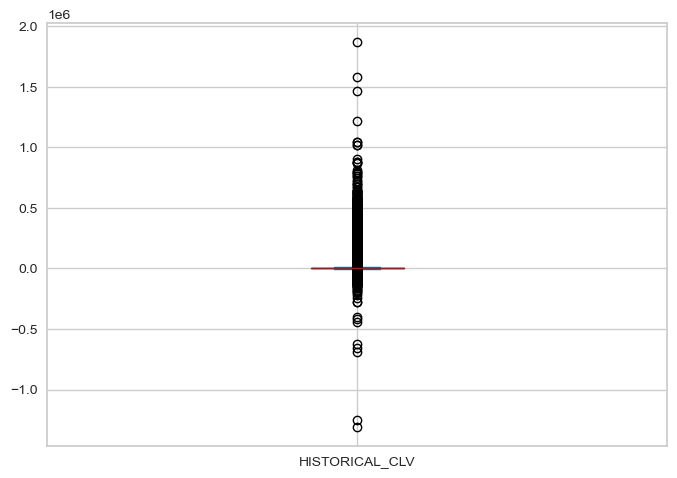

In [41]:
customer_aggregates['HISTORICAL_CLV'].plot(kind='box')
plt.show()

In [42]:
from lifetimes import BetaGeoFitter, GammaGammaFitter
from lifetimes.utils import summary_data_from_transaction_data

summary = summary_data_from_transaction_data(data_2022, 'BET_ACCOUNT_NUM_HASH', 'DATE_DIM', 
                                             monetary_value_col='TOTAL_TURNOVER')
summary = summary[(summary['frequency'] > 0) & (summary['monetary_value'] > 0)]

bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(summary['frequency'], summary['recency'], summary['T'])

ggf = GammaGammaFitter(penalizer_coef=0.0)
ggf.fit(summary['frequency'], summary['monetary_value'])

summary = summary.assign(
    predicted_purchases=summary.apply(
        lambda row: bgf.conditional_expected_number_of_purchases_up_to_time(365, row['frequency'], row['recency'], row['T']), axis=1
    ),
    predicted_value=summary.apply(
        lambda row: ggf.conditional_expected_average_profit(row['frequency'], row['monetary_value']), axis=1
    )
)

summary['PREDICTED_CLV'] = summary['predicted_purchases'] * summary['predicted_value']

summary.head()

frequency  recency      T  monetary_value  \
BET_ACCOUNT_NUM_HASH                                              
13154                     199.0    364.0  364.0      483.747487   
18379                     121.0    364.0  364.0      153.355372   
129273                     14.0    331.0  343.0        7.857143   
348318                      3.0    106.0  204.0        6.666667   
385032                      3.0     87.0  350.0        6.000000   

                      predicted_purchases  predicted_value  PREDICTED_CLV  
BET_ACCOUNT_NUM_HASH                                                       
13154                          190.797392       484.265066   92396.511512  
18379                          116.335767       153.787777   17891.018953  
129273                          14.957604        10.019629     149.869643  
348318                           5.164280        17.121271      88.419033  
385032                           0.693238        16.418692      11.382060

<Axes: >

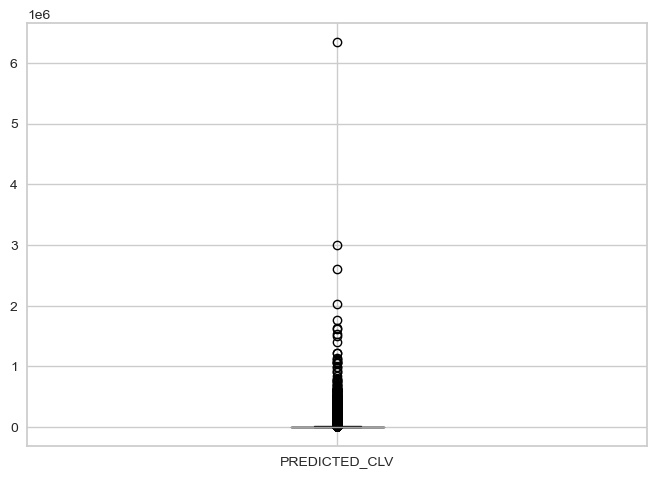

In [43]:
summary[['PREDICTED_CLV']].boxplot()

In [44]:
top_10_predicted_clv = summary.sort_values(by='PREDICTED_CLV', ascending=False).head(10)
top_10_predicted_clv

frequency  recency      T  monetary_value  \
BET_ACCOUNT_NUM_HASH                                              
2733133229                 61.0     85.0   85.0    27580.028197   
2658266703                296.0    364.0  364.0    10596.307297   
2846856011                247.0    359.0  364.0    11097.004211   
1698096372                353.0    364.0  364.0     5978.988669   
2913179117                257.0    364.0  364.0     7125.150195   
2889453684                338.0    364.0  364.0     5019.124260   
1345045705                 74.0    139.0  140.0     9144.964189   
2970638381                 40.0     40.0   40.0     5194.134250   
414104496                 310.0    364.0  364.0     5047.532323   
2421870804                154.0    156.0  156.0     4231.457468   

                      predicted_purchases  predicted_value  PREDICTED_CLV  
BET_ACCOUNT_NUM_HASH                                                       
2733133229                     229.393078     27650.007458   6.342720e+06  
2658266703                     283.397201     10601.896786   3.004548e+06  
2846856011                     233.874109     11104.014275   2.596941e+06  
1698096372                     337.811538      5981.668551   2.020677e+06  
2913179117                     246.166344      7129.516014   1.755047e+06  
2889453684                     323.491975      5021.487454   1.624411e+06  
1345045705                     175.871382      9164.343197   1.611746e+06  
2970638381                     293.108285      5214.844496   1.528514e+06  
414104496                      296.762125      5050.123131   1.498685e+06  
2421870804                     329.349616      4235.861932   1.395079e+06

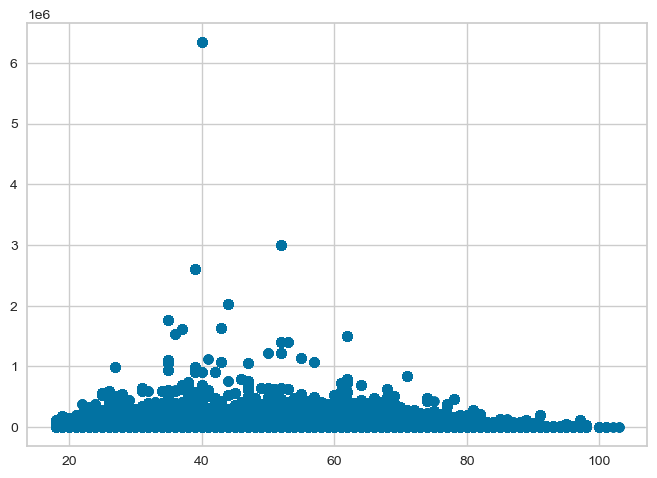

In [45]:
merged_data = data_2022.merge(summary, on='BET_ACCOUNT_NUM_HASH', how='inner')
plt.scatter(merged_data['AGE'], merged_data['PREDICTED_CLV'])

# III. Data Visualization

## 3.1 Descriptive Analysis

In [46]:
df.head()

DATE_DIM  DAY_OF_WEEK  BET_ACCOUNT_NUM_HASH   AGE AGE_BAND GENDER  \
0 2021-01-01            6                 13154  67.0      65+      M   
1 2021-01-01            6                 18379  54.0    45-54      M   
2 2021-01-01            6                559232  63.0    55-64      M   
3 2021-01-01            6                698904  69.0      65+      M   
4 2021-01-01            6                762921  67.0      65+      M   

   TENURE_IN_DAYS RESIDENTIAL_STATE  FOB_RACING_TURNOVER  FOB_SPORT_TURNOVER  \
0           11846                WA                 37.0                 0.0   
1            1884                WA                 40.0                 0.0   
2            2866                WA                  0.0                 0.0   
3            2100                WA                  0.0                 0.0   
4            4766                WA                  0.0                 0.0   

   ...  PARI_SPORT_TURNOVER  TOTAL_TURNOVER  DIVIDENDS_PAID  GROSS_MARGIN  \
0  ...                  0.0          1118.0          443.55    271.254275   
1  ...                  0.0            40.0            0.00     40.000000   
2  ...                  0.0            12.0            9.50      2.041720   
3  ...                  0.0          1223.5          267.91    245.117147   
4  ...                  0.0            17.5            0.00      3.504075   

   TICKETS  Week  Month  Year   COHORT PERIOD  
0      288    53      1  2021  2021-01      0  
1        1    53      1  2021  2021-01      0  
2        5    53      1  2021  2021-01      0  
3       40    53      1  2021  2021-01      0  
4        5    53      1  2021  2021-01      0  

[5 rows x 21 columns]

### 3.1.1 Age

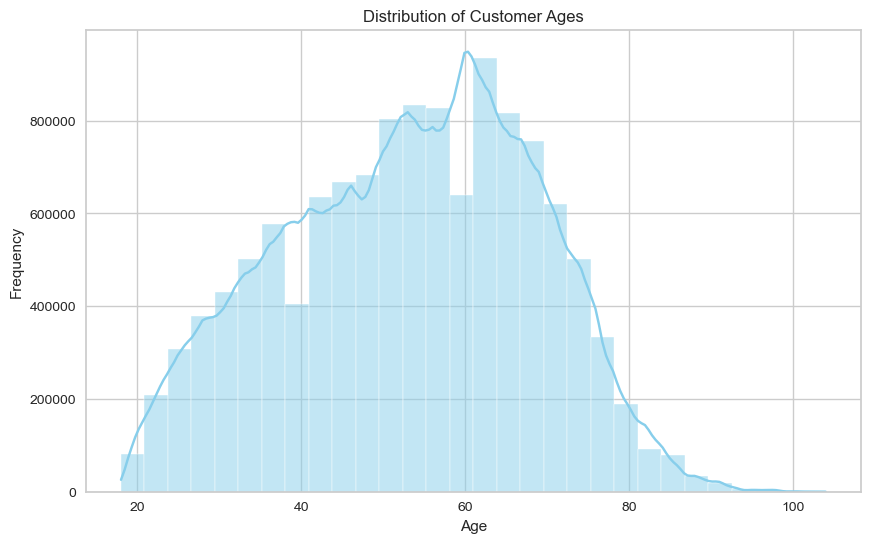

In [47]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### 3.1.2 Gender

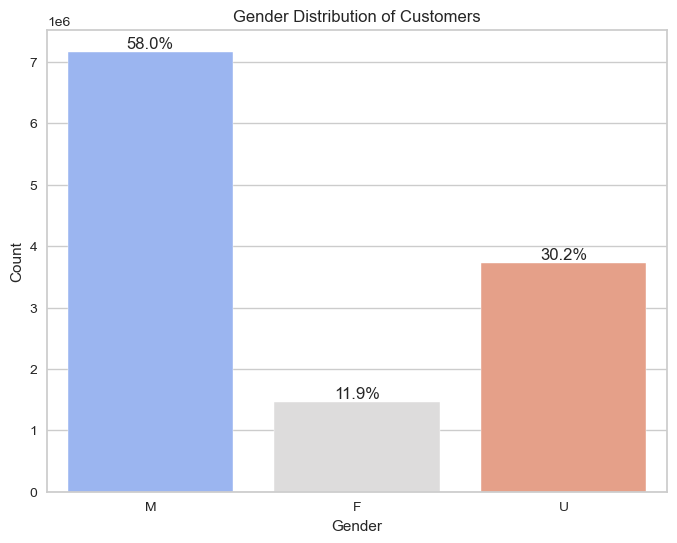

In [48]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='GENDER', data=df, palette='coolwarm')
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')

total = len(df['GENDER'])
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

Theo biểu đồ:

- Phần lớn khách hàng là nam giới, chiếm 58.0%.
- Số lượng khách hàng nữ ít hơn, chỉ chiếm 11.9%.
- Có một tỷ lệ đáng kể khách hàng không xác định giới tính (có thể là không cung cấp hoặc dữ liệu không rõ ràng), chiếm 30.2%.

Dựa vào thông tin từ biểu đồ, ta có thể rút ra một số insight như sau:

1. Có vẻ như đàn ông tham gia cá cược nhiều hơn phụ nữ, điều này có thể ảnh hưởng đến cách tiếp cận marketing và sản phẩm của WA TAB.
2. Tỷ lệ khách hàng không xác định giới tính cao gần bằng một nửa số lượng khách hàng nam, điều này cho thấy rằng có một cơ hội để tăng cường việc thu thập dữ liệu giới tính hoặc để tối ưu hóa chiến lược tiếp cận khách hàng không xác định.
3. WA TAB có thể cần phát triển sản phẩm và dịch vụ nhắm đến đặc trưng của từng nhóm giới tính, đặc biệt là tập trung vào việc thu hút nhiều khách hàng nữ hơn.
4. Các chương trình khuyến mãi hoặc sản phẩm cá cược có thể được thiết kế để thu hút nhiều khách hàng nữ hơn, hoặc để phục vụ nhu cầu đa dạng của nhóm khách hàng không xác định.

Nếu WA TAB muốn cải thiện việc thu hút và giữ chân khách hàng, họ có thể cần phân tích sâu hơn về hành vi đặt cược và sở thích của từng nhóm giới tính để phát triển các chiến lược marketing và sản phẩm cụ thể hơn.

### 3.1.3 Tenure in Days

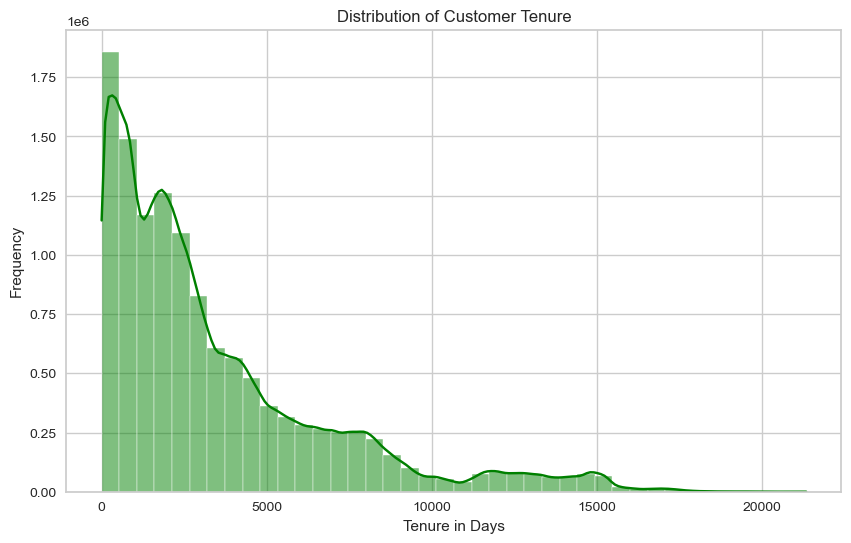

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TENURE_IN_DAYS'], bins=40, kde=True, color='green')
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure in Days')
plt.ylabel('Frequency')
plt.show()

Biểu đồ mô tả phân bố thời gian khách hàng ở lại với WA TAB theo số ngày. Đây là những insights có thể rút ra từ biểu đồ này:

1. **Độ nghiêng lớn**: Có một số lượng lớn khách hàng mới hoặc khách hàng có thời gian ngắn, hàm ý rằng WA TAB thu hút nhiều khách hàng mới hoặc có khách hàng chỉ tham gia trong một thời gian ngắn.
2. **Giảm dần nhanh chóng**: Số lượng khách hàng giảm nhanh sau khoảng thời gian ban đầu, có thể chỉ ra rằng khách hàng không duy trì hoạt động cá cược lâu dài.
3. **Lượng khách hàng trung thành nhỏ**: Một lượng nhỏ khách hàng có thời gian ở lại dài hơn (từ 5,000 ngày trở lên), có thể được coi là khách hàng trung thành.

Về mối quan hệ với biến `TOTAL_TURNOVER`, đây là một số điểm mà WA TAB có thể xem xét:

- **Khách hàng mới so với khách hàng lâu năm**: Khách hàng mới có thể có tổng doanh thu đặt cược thấp hơn so với những người đã tham gia lâu dài do sự không chắc chắn và thói quen đặt cược chưa phát triển.
- **Giá trị khách hàng lâu dài (LTV)**: Khách hàng có thời gian ở lại lâu hơn có thể có Giá trị trọn đời cao hơn, có nghĩa là họ có thể tạo ra doanh thu cao hơn trong suốt thời gian họ tham gia.
- **Churn Rate**: Tỷ lệ khách hàng ngừng sử dụng dịch vụ có thể ảnh hưởng đến tổng doanh thu. Việc giảm tỷ lệ này có thể tăng doanh thu bền vững.
- **Segmentation và Retention Strategies**: Phân đoạn khách hàng dựa trên thời gian ở lại để xác định những ai là khách hàng có giá trị cao và phát triển các chiến lược nhằm tăng cường giữ chân họ.

WA TAB nên xem xét phân tích thêm để xác định mối liên kết cụ thể giữa thời gian ở lại và tổng doanh thu đặt cược. Điều này có thể bao gồm việc xác định các xu hướng đặt cược trong các nhóm khác nhau dựa trên thời gian ở lại và phát triển chiến lược để tối ưu hóa giá trị từ các nhóm khách hàng khác nhau.

### 3.1.4 Các Biến Tiền Bạc

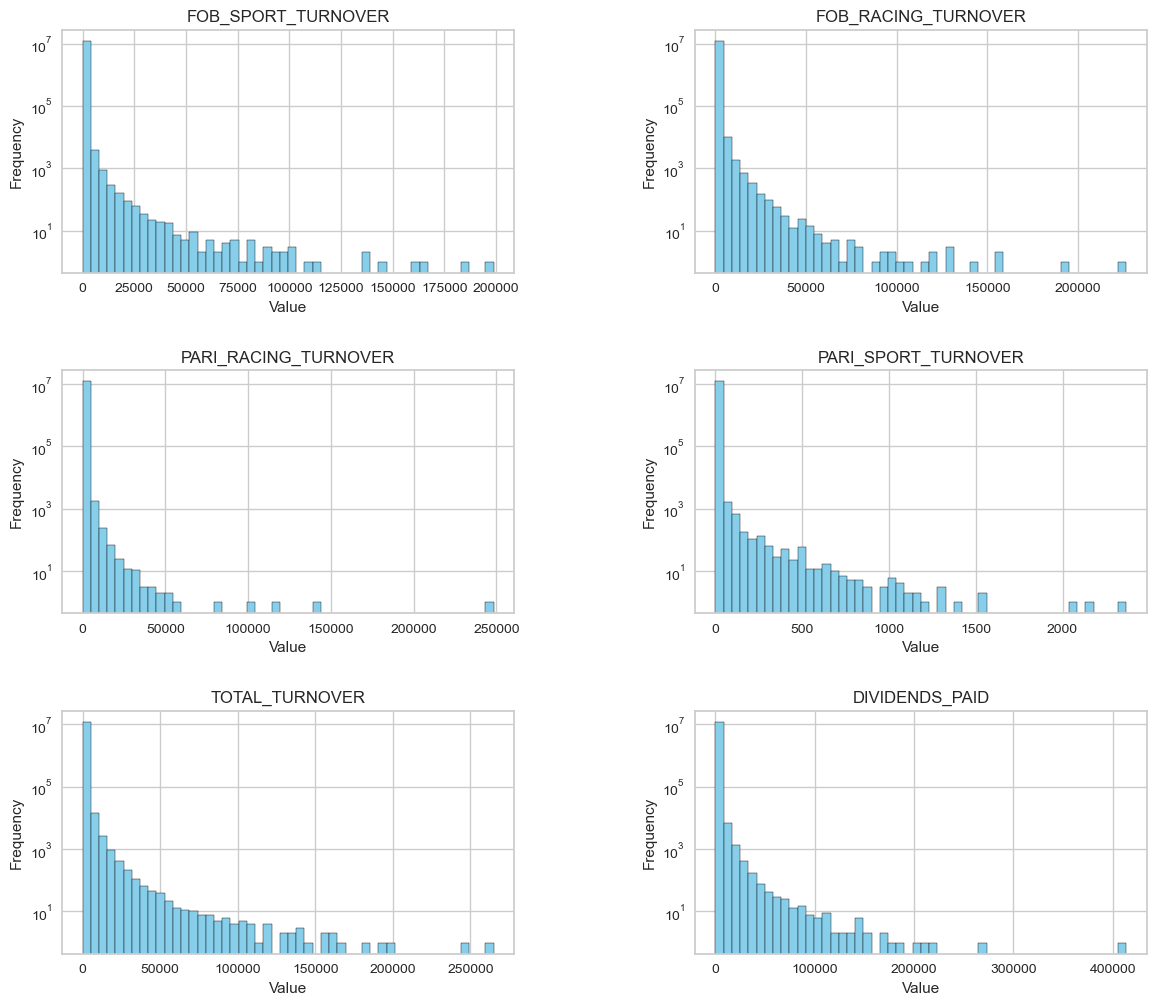

In [50]:
columns_to_plot = ['FOB_SPORT_TURNOVER', 'FOB_RACING_TURNOVER',
                   'PARI_RACING_TURNOVER', 'PARI_SPORT_TURNOVER',
                   'TOTAL_TURNOVER', 'DIVIDENDS_PAID']

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, column in enumerate(columns_to_plot):
    ax = axs[i//2, i%2]
    df[column].hist(bins=50, ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(column)
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Value')
    ax.set_yscale('log')

plt.show()

Các biểu đồ bạn cung cấp đều có dạng log-log, nghĩa là cả trục x (giá trị) và trục y (tần suất) đều được hiển thị trên thang logarit. Điều này thường được sử dụng để thể hiện dữ liệu phân phối lệch hoặc khi có sự chênh lệch lớn giữa các giá trị. Dưới đây là nhận xét và insight cho từng biểu đồ:

1. **FOB_SPORT_TURNOVER**:
   - Phân phối tập trung cao ở giá trị thấp, giảm mạnh khi giá trị tăng.
   - Điều này cho thấy số lượng lớn khách hàng đặt cược ít trên thể thao và số ít khách hàng đặt cược với số tiền lớn.

2. **FOB_RACING_TURNOVER**:
   - Mô hình tương tự như FOB_SPORT_TURNOVER, nhưng với phạm vi giá trị cao hơn.
   - Có thể thấy rằng cá cược đua ngựa có tổng doanh số cao hơn so với cá cược thể thao.

3. **PARI_RACING_TURNOVER**:
   - Cũng giống như hai biểu đồ trước, nhưng giới hạn ở giá trị thấp hơn.
   - Cá cược Parimutuel trong đua ngựa không phải là lựa chọn phổ biến so với Fixed Odds Betting (FOB).

4. **PARI_SPORT_TURNOVER**:
   - Phạm vi giá trị còn thấp hơn nhiều so với cá cược đua ngựa.
   - Rất ít khách hàng tham gia cá cược Parimutuel trên thể thao, hàm ý đây không phải là hình thức cá cược được ưa chuộng.

5. **TOTAL_TURNOVER**:
   - Đây là tổng số doanh thu từ tất cả các loại cá cược.
   - Mô hình phân phối tương tự như các loại cá cược riêng lẻ, với đa số doanh thu đến từ những giao dịch nhỏ.

6. **DIVIDENDS_PAID**:
   - Phân phối này có hình dạng giống với tổng doanh thu, điều này hợ có thể giả định rằng có mối quan hệ mật thiết giữa số tiền đặt cược và số tiền trả thưởng. Phần lớn số tiền thưởng được trả cho những khoản đặt cược nhỏ, với một số ít trường hợp có số tiền thưởng lớn.

Dựa trên những quan sát này, dưới đây là một số insights mà WA TAB có thể xem xét:

- **Phân khúc khách hàng**: Hầu hết khách hàng có xu hướng đặt cược với số tiền nhỏ. WA TAB có thể tập trung vào việc tối ưu hóa trải nghiệm cho phân khúc này để tăng cường sự hài lòng và khả năng quay lại đặt cược.
- **Sản phẩm và chiến lược**: Có vẻ như đua ngựa là một phần quan trọng của doanh thu cá cược, đòi hỏi chiến lược marketing và sản phẩm chú trọng đến loại hình này.
- **Cá cược Parimutuel**: Cần phải đánh giá lại sự hấp dẫn của cá cược Parimutuel so với FOB, đặc biệt là trong thể thao, do số lượng giao dịch thấp.
- **Định giá và Quản lý rủi ro**: Sự chênh lệch lớn giữa các khoản đặt cược nhỏ và lớn đòi hỏi một hệ thống định giá tốt và quản lý rủi ro để đảm bảo lợi nhuận.
- **Chiến lược giữ chân**: Xem xét phát triển các chương trình khách hàng thân thiết hoặc ưu đãi để giữ chân những khách hàng đặt cược lớn, do họ có thể tạo ra một phần đáng kể của tổng doanh thu.
- **Khám phá mối quan hệ doanh thu và thưởng**: Phân tích mối quan hệ giữa tổng doanh thu và tiền thưởng được trả để tối ưu hóa chính sách thưởng lũy tiến hoặc giảm thiểu rủi ro cho công ty.

### 3.1.5 Days of Week

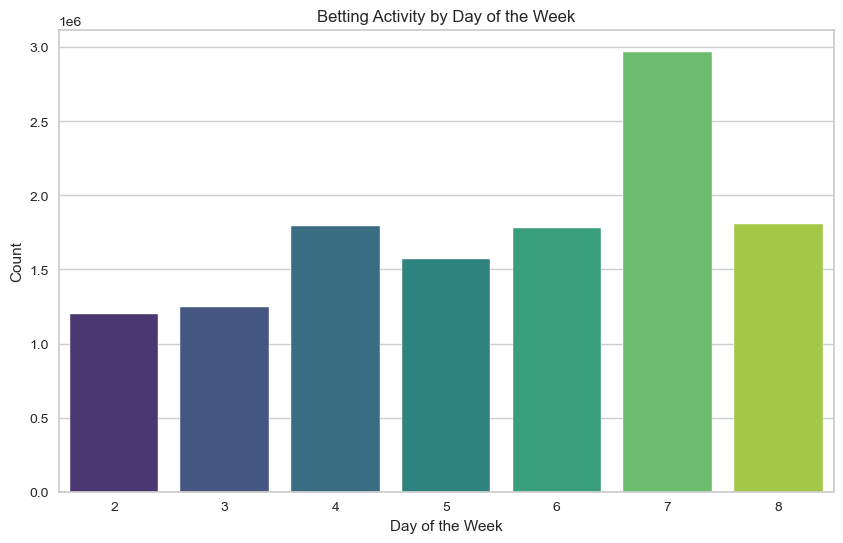

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(x='DAY_OF_WEEK', data=df, palette='viridis')
plt.title('Betting Activity by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

Biểu đồ thể hiện số lượng hoạt động đặt cược theo từng ngày trong tuần. Dưới đây là một số insights có thể rút ra từ biểu đồ:

- **Tăng cường vào cuối tuần**: Có sự gia tăng rõ rệt về số lượng đặt cược vào ngày thứ Bảy, đây là ngày cao điểm trong tuần với lượng đặt cược nhiều nhất.
- **Hoạt động thấp vào đầu tuần**: Ngày thứ Hai và thứ Ba có số lượng đặt cược thấp nhất trong tuần, cho thấy sự quan tâm giảm sút sau cuối tuần.
- **Xu hướng tăng dần**: Từ thứ Ba đến thứ Sáu, có thể thấy số lượng đặt cược tăng dần, hàm ý rằng hoạt động cá cược có xu hướng tăng lên theo dần dần khi tiến gần đến cuối tuần.
- **Chủ nhật**: Mặc dù số lượng đặt cược vào Chủ nhật giảm so với thứ Bảy, nhưng vẫn cao hơn so với ngày thường, cho thấy ngày cuối tuần vẫn là thời điểm quan trọng đối với hoạt động cá cược.

Dựa vào những thông tin này, WA TAB có thể:

- **Điều chỉnh chiến dịch marketing**: Tăng cường chiến dịch quảng cáo và khuyến mãi vào cuối tuần để thu hút khách hàng.
- **Lên lịch sự kiện**: Tổ chức các sự kiện lớn hoặc đặt cược đặc biệt vào thứ Bảy để tận dụng ngày có lượng đặt cược cao nhất.
- **Phân tích chi tiết hơn**: Nghiên cứu sâu hơn về loại sự kiện nào hoặc loại đặt cược nào được ưa chuộng vào cuối tuần để định hình sản phẩm và dịch vụ tốt hơn.
- **Giảm bớt sự giảm sút**: Phát triển các chiến lược để kích thích hoạt động đặt cược vào những ngày đầu tuần khi hoạt động đặt cược thấp.

WA TAB nên xem xét những dữ liệu này khi lập kế hoạch cho các chiến lược phát triển sản phẩm, marketing và quản lý rủi ro.

### 3.1.6 Residential State

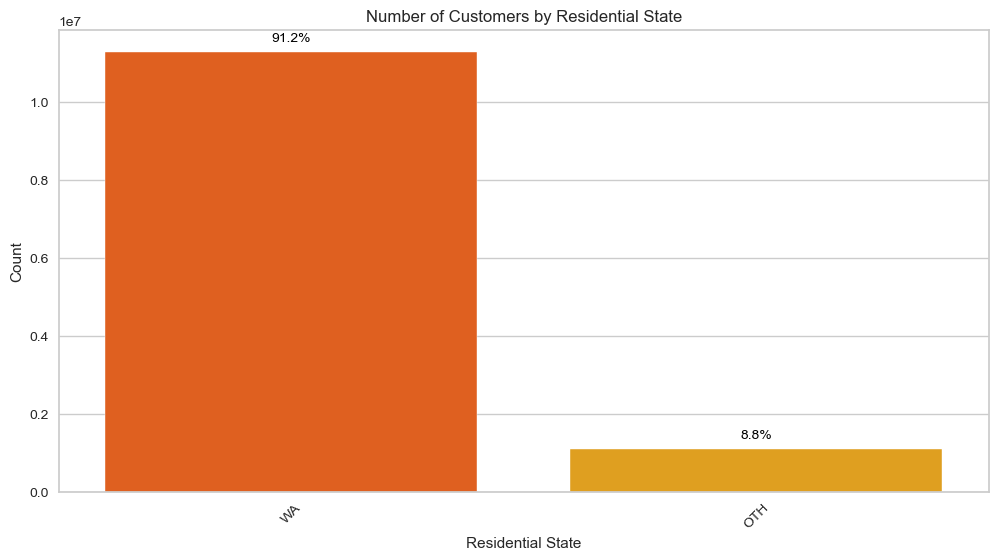

In [52]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='RESIDENTIAL_STATE', data=df, palette='autumn')
plt.title('Number of Customers by Residential State')
plt.xlabel('Residential State')
plt.ylabel('Count')
plt.xticks(rotation=45)

total = len(df['RESIDENTIAL_STATE'])

for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', rotation=0, xytext=(0, 10),
                textcoords='offset points')

plt.show()

Biểu đồ thể hiện phân bố số lượng khách hàng theo tiểu bang cư trú, với "WA" là Tây Úc và "OTH" có thể hiểu là các tiểu bang hoặc khu vực khác. Dưới đây là một số nhận xét và insights:

- **Phân bố khách hàng chủ yếu ở WA**: Một phần lớn khách hàng (91.2%) là cư dân của Tây Úc, nơi mà Racing and Wagering Western Australia (RWWA) hoạt động.
- **Một lượng nhỏ khách hàng từ các khu vực khác (OTH)**: Chỉ có 8.8% khách hàng đến từ các khu vực ngoài Tây Úc.

Dựa trên thông tin này, WA TAB có thể:

- **Chiến lược tập trung**: Tập trung vào việc cung cấp dịch vụ và sản phẩm cá cược tốt hơn cho thị trường chính là Tây Úc.
- **Mở rộng thị trường**: Xác định các cơ hội để mở rộng thị trường ngoài Tây Úc và thu hút thêm khách hàng từ các khu vực khác.
- **Nghiên cứu thị trường địa phương**: Phân tích sâu hơn về hành vi và sở thích cá cược của cư dân Tây Úc để tối ưu hóa các chiến dịch marketing và sản phẩm cá cược.
- **Chiến lược đa dạng hóa**: Phát triển các chiến lược để thu hút và giữ chân khách hàng ở các tiểu bang hoặc khu vực khác, có thể thông qua việc cung cấp các sản phẩm cá cược đặc trưng phù hợp với từng địa phương.

WA TAB nên cân nhắc đến những số liệu này khi đánh giá chiến lược phát triển thị trường và cung cấp dịch vụ.

### 3.1.7 Age Band

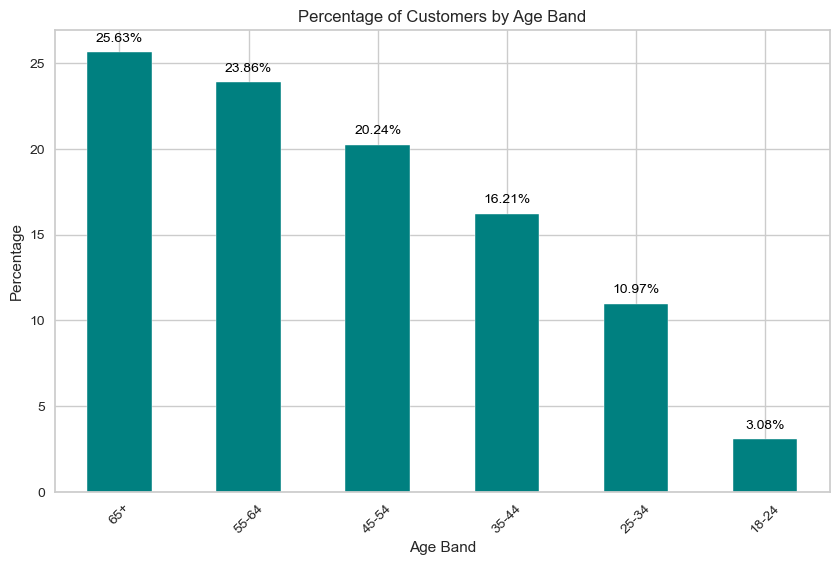

In [53]:
age_band_percentage = df['AGE_BAND'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
ax = age_band_percentage.plot(kind='bar', color='teal')
plt.title('Percentage of Customers by Age Band')
plt.xlabel('Age Band')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', rotation=0, xytext=(0, 10),
                textcoords='offset points')

plt.show()

Biểu đồ trình bày phân bố phần trăm khách hàng theo nhóm tuổi. Dưới đây là một số insights và nhận xét:

- **Nhóm tuổi 65+ và 55-64 chiếm ưu thế**: Những người ở độ tuổi nghỉ hưu hoặc gần nghỉ hưu có tỷ lệ cao nhất trong cơ sở khách hàng, với tổng cộng hơn 49%.
- **Giảm dần theo độ tuổi**: Tỷ lệ khách hàng giảm dần khi độ tuổi giảm, với nhóm 35-44 chiếm 20.22%, nhóm 25-34 chiếm 16.21%, và nhóm 18-24 chiếm 10.97%.
- **Nhóm tuổi trẻ ít tham gia hơn**: Phần trăm khách hàng trong độ tuổi từ 18 đến 24 tương đối thấp.
- **Không rõ ràng**: Một tỷ lệ rất nhỏ khách hàng không xác định tuổi tác.

Dựa trên những thông tin này, WA TAB có thể:

- **Tập trung vào khách hàng lớn tuổi**: Tối ưu hóa các sản phẩm và dịch vụ cho nhóm tuổi lớn, có thể là vì họ có nhiều thời gian rảnh rỗi và nguồn tài chính ổn định hơn.
- **Tăng cường tiếp cận với giới trẻ**: Phát triển sản phẩm và chiến dịch marketing để thu hút những khách hàng trẻ hơn, có thể thông qua việc sử dụng công nghệ và các nền tảng trực tuyến.
- **Chiến lược tùy chỉnh**: Xem xét đặc điểm và sở thích đặc trưng của từng nhóm tuổi để tạo ra các sản phẩm cá cược và chương trình khuyến mãi phù hợp.
- **Khám phá tiềm năng của các nhóm tuổi khác nhau**: Tìm hiểu xem liệu nhóm tuổi nào có khả năng chi tiêu cao hơn hoặc trung thành hơn với thương hiệu để tối ưu hóa doanh thu và giữ chân khách hàng.
- **Dữ liệu không rõ**: Cải thiện việc thu thập dữ liệu để giảm số lượng khách hàng với thông tin tuổi không rõ ràng, từ đó có cái nhìn rõ ràng hơn về cơ sở khách hàng và tối ưu hóa chiến lược.

Những insights này sẽ giúp WA TAB phát triển các chiến lược tiếp cận khách hàng mục tiêu và cung cấp dịch vụ cá cược một cách hiệu quả hơn.

### 3.1.8 Tickets

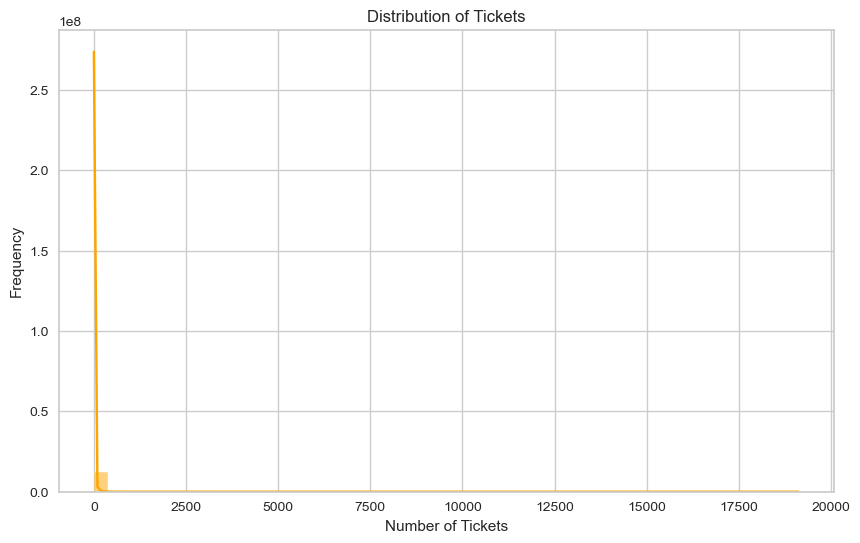

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TICKETS'], bins=50, kde=True, color='orange')
plt.title('Distribution of Tickets')
plt.xlabel('Number of Tickets')
plt.ylabel('Frequency')
plt.show()

### 3.1.9 Bet Account Number

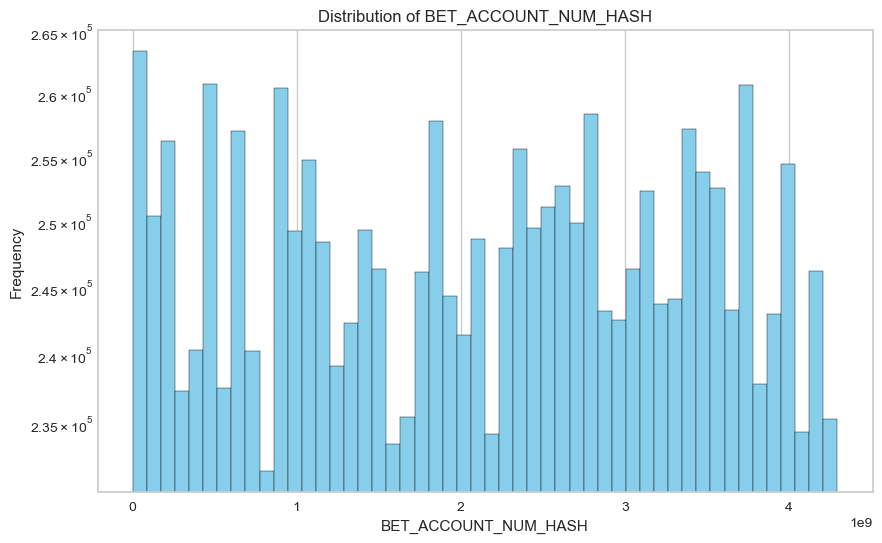

In [55]:
plt.figure(figsize=(10, 6))
df['BET_ACCOUNT_NUM_HASH'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of BET_ACCOUNT_NUM_HASH')
plt.xlabel('BET_ACCOUNT_NUM_HASH')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

### 3.1.10 Gross Margin

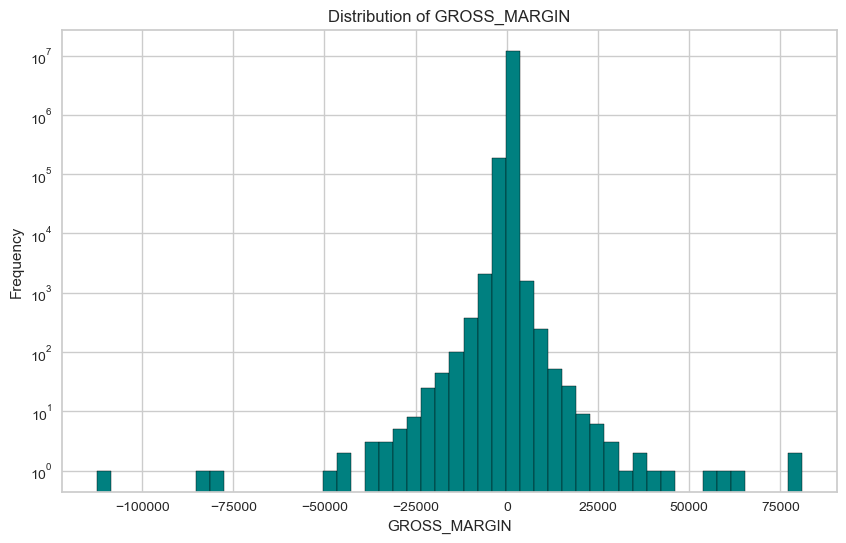

In [56]:
plt.figure(figsize=(10, 6))
df['GROSS_MARGIN'].hist(bins=50, color='teal', edgecolor='black')
plt.title('Distribution of GROSS_MARGIN')
plt.xlabel('GROSS_MARGIN')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

## 3.2 Correlation Visualization

### 3.2.1 Demographic Variables

#### 3.2.1.1 Age and Total Turnover

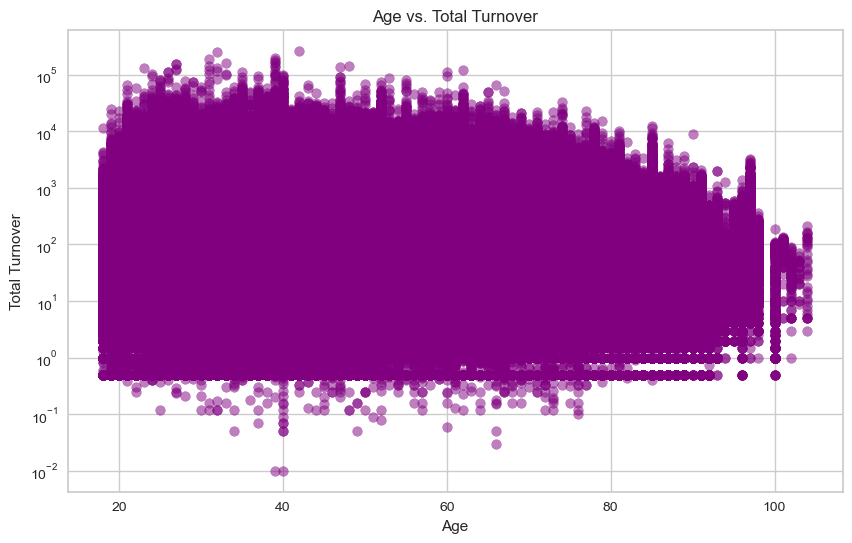

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(df['AGE'], df['TOTAL_TURNOVER'], alpha=0.5, color='purple')
plt.title('Age vs. Total Turnover')
plt.xlabel('Age')
plt.ylabel('Total Turnover')
plt.yscale('log')
plt.show()

#### 3.2.1.2 Gender and Total Turnover

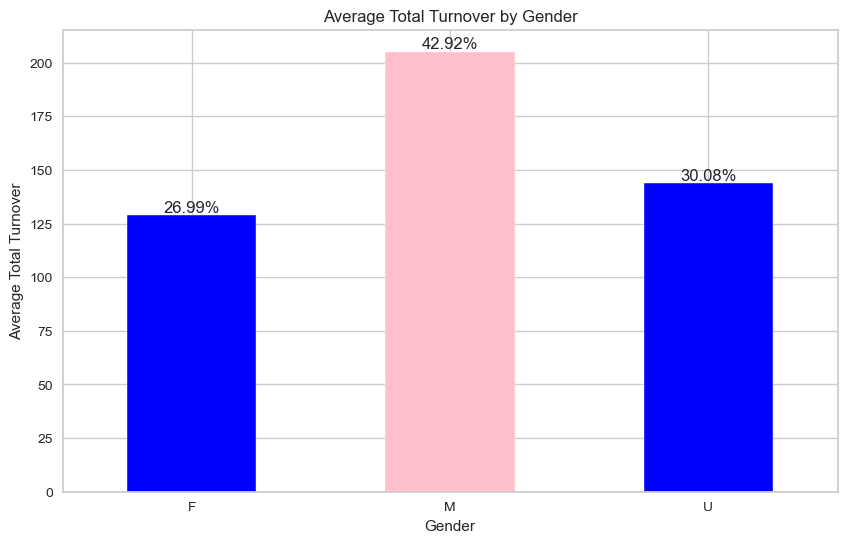

In [58]:
gender_turnover_means = df.groupby('GENDER')['TOTAL_TURNOVER'].mean()

ax = gender_turnover_means.plot(kind='bar', color=['blue', 'pink'], figsize=(10, 6))
plt.title('Average Total Turnover by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Total Turnover')
plt.xticks(rotation=0)

total_turnover = gender_turnover_means.sum()
percentages = (gender_turnover_means / total_turnover) * 100

for i, value in enumerate(gender_turnover_means):
    plt.text(i, value, f'{percentages[i]:.2f}%', ha='center', va='bottom')

plt.show()

#### 3.2.1.3 Residental State vs Total Turnover

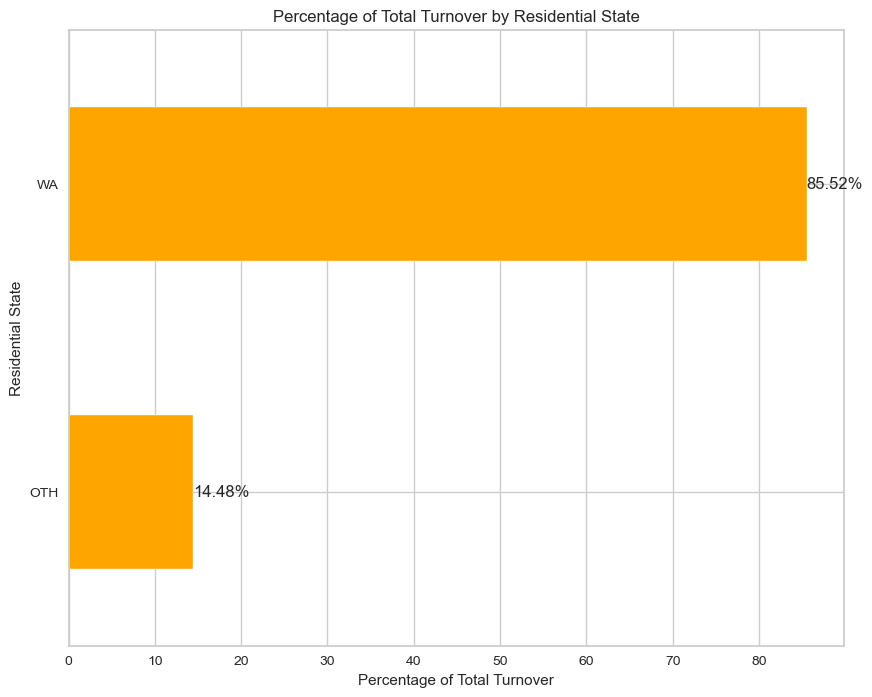

In [59]:
total_turnover_all_states = df['TOTAL_TURNOVER'].sum()

total_turnover_by_state = df.groupby('RESIDENTIAL_STATE')['TOTAL_TURNOVER'].sum()

percentage_turnover_by_state = (total_turnover_by_state / total_turnover_all_states) * 100

percentage_turnover_by_state_sorted = percentage_turnover_by_state.sort_values()

ax = percentage_turnover_by_state_sorted.plot(kind='barh', figsize=(10, 8), color='orange')
plt.title('Percentage of Total Turnover by Residential State')
plt.xlabel('Percentage of Total Turnover')
plt.ylabel('Residential State')

for i, value in enumerate(percentage_turnover_by_state_sorted):
    plt.text(value, i, f'{value:.2f}%', va='center')

plt.show()

#### 3.2.1.4 Days of Week vs Total Turnover

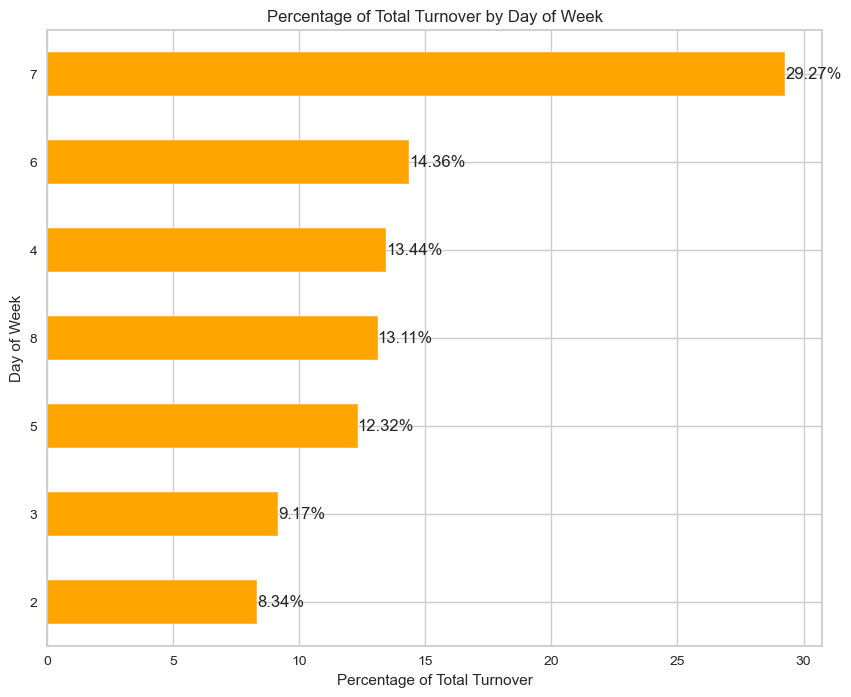

In [60]:
total_turnover_all_states = df['TOTAL_TURNOVER'].sum()

total_turnover_by_day_of_week = df.groupby('DAY_OF_WEEK')['TOTAL_TURNOVER'].sum()

percentage_turnover_by_day_of_week = (total_turnover_by_day_of_week / total_turnover_all_states) * 100

percentage_turnover_by_dayofweek_sorted = percentage_turnover_by_day_of_week.sort_values()

ax = percentage_turnover_by_dayofweek_sorted.plot(kind='barh', figsize=(10, 8), color='orange')
plt.title('Percentage of Total Turnover by Day of Week')
plt.xlabel('Percentage of Total Turnover')
plt.ylabel('Day of Week')

for i, value in enumerate(percentage_turnover_by_dayofweek_sorted):
    plt.text(value, i, f'{value:.2f}%', va='center')

plt.show()

### 3.2.2 Betting Behavior

#### 3.2.2.1 FOB Racing vs Total Turnover

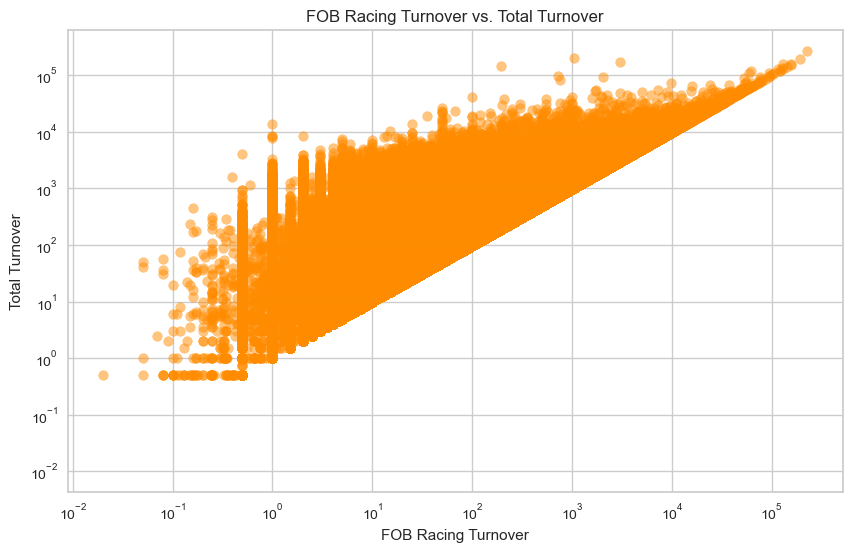

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(df['FOB_RACING_TURNOVER'], df['TOTAL_TURNOVER'], alpha=0.5, color='darkorange')
plt.title('FOB Racing Turnover vs. Total Turnover')
plt.xlabel('FOB Racing Turnover')
plt.ylabel('Total Turnover')
plt.xscale('log')
plt.yscale('log')
plt.show()

#### 3.2.2.2 FOB Sport vs Total Turnover

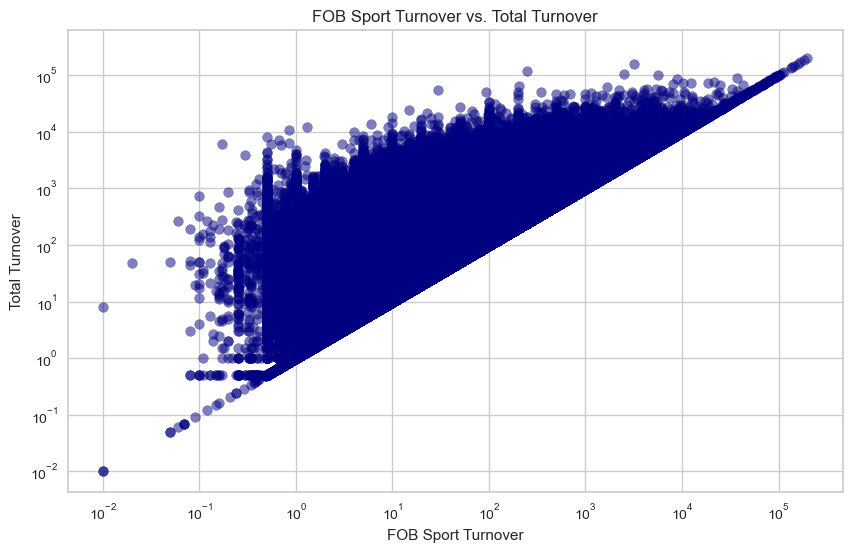

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(df['FOB_SPORT_TURNOVER'], df['TOTAL_TURNOVER'], alpha=0.5, color='navy')
plt.title('FOB Sport Turnover vs. Total Turnover')
plt.xlabel('FOB Sport Turnover')
plt.ylabel('Total Turnover')
plt.xscale('log')
plt.yscale('log')
plt.show()

#### 3.2.2.3 Pari Racing vs Total Turnover

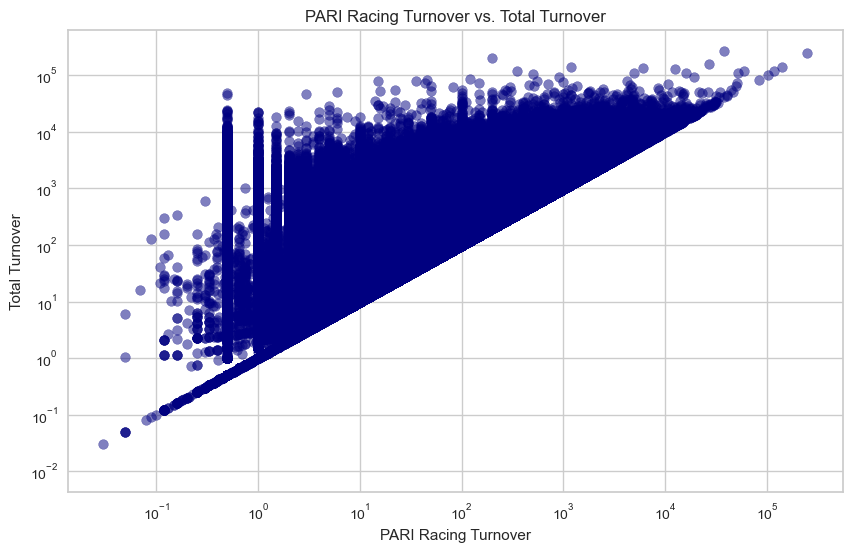

In [63]:
plt.figure(figsize=(10, 6))
plt.scatter(df['PARI_RACING_TURNOVER'], df['TOTAL_TURNOVER'], alpha=0.5, color='navy')
plt.title('PARI Racing Turnover vs. Total Turnover')
plt.xlabel('PARI Racing Turnover')
plt.ylabel('Total Turnover')
plt.xscale('log')
plt.yscale('log')
plt.show()

#### 3.2.2.4 Pari Sport vs Total Turnover

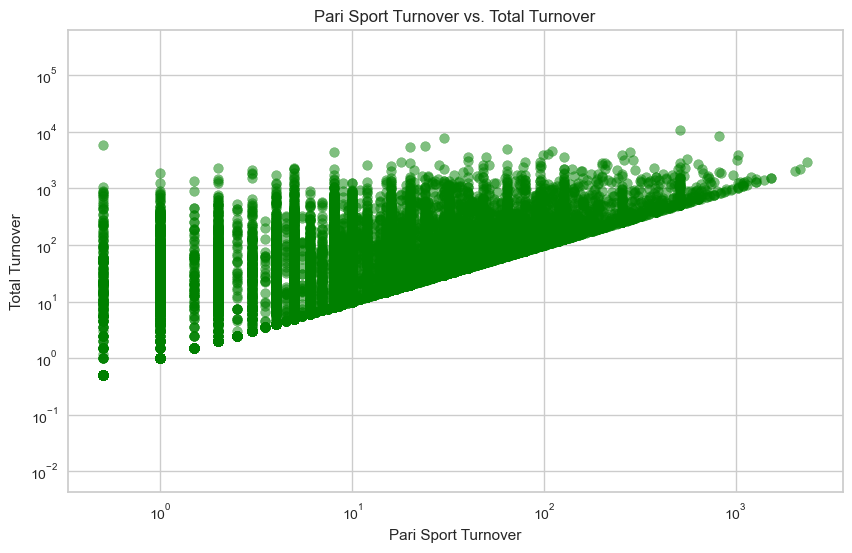

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(df['PARI_SPORT_TURNOVER'], df['TOTAL_TURNOVER'], alpha=0.5, color='green')
plt.title('Pari Sport Turnover vs. Total Turnover')
plt.xlabel('Pari Sport Turnover')
plt.ylabel('Total Turnover')
plt.xscale('log')
plt.yscale('log')
plt.show()

### 3.2.3 Customer Loyalty and Engagement

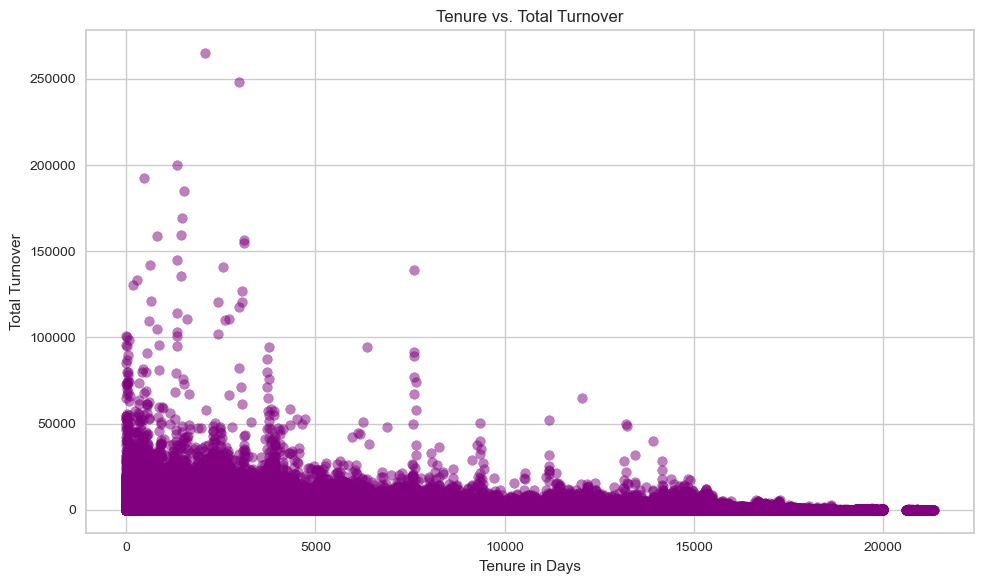

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(df['TENURE_IN_DAYS'], df['TOTAL_TURNOVER'], alpha=0.5, color='purple')
plt.title('Tenure vs. Total Turnover')
plt.xlabel('Tenure in Days')
plt.ylabel('Total Turnover')
plt.grid(True)
plt.tight_layout()

plt.show()

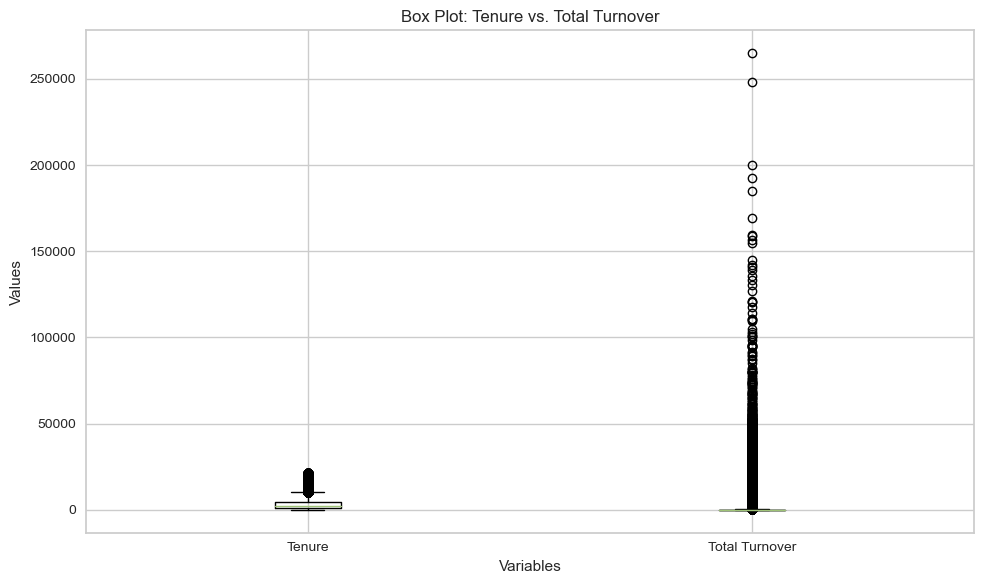

In [66]:
plt.figure(figsize=(10, 6))
plt.boxplot([df['TENURE_IN_DAYS'], df['TOTAL_TURNOVER']], labels=['Tenure', 'Total Turnover'])
plt.title('Box Plot: Tenure vs. Total Turnover')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.grid(True)
plt.tight_layout()

plt.show()

### 3.2.4 Financial Outcomes

#### 3.2.4.1 Gross Margin and Total Turnover

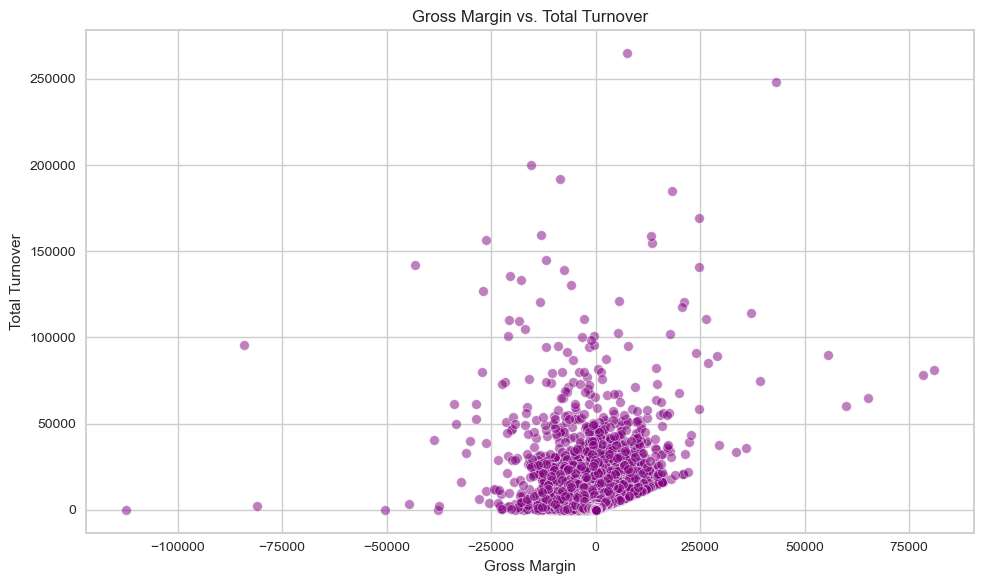

Correlation Coefficient between Gross Margin and Total Turnover: 0.1426367383057114


In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GROSS_MARGIN', y='TOTAL_TURNOVER', color='purple', alpha=0.5)
plt.title('Gross Margin vs. Total Turnover')
plt.xlabel('Gross Margin')
plt.ylabel('Total Turnover')
plt.grid(True)
plt.tight_layout()
plt.show()

correlation_coefficient = df['GROSS_MARGIN'].corr(df['TOTAL_TURNOVER'])
print("Correlation Coefficient between Gross Margin and Total Turnover:", correlation_coefficient)

#### 3.2.4.2 Dividends Paid and Total Turnover

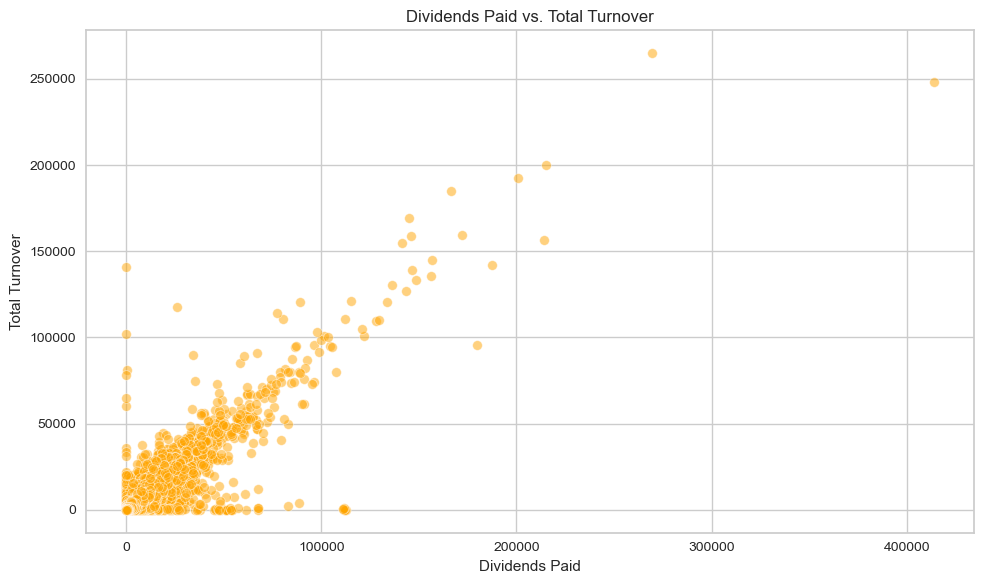

Correlation Coefficient between Dividends Paid and Total Turnover: 0.8991408993835687


In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='DIVIDENDS_PAID', y='TOTAL_TURNOVER', color='orange', alpha=0.5)
plt.title('Dividends Paid vs. Total Turnover')
plt.xlabel('Dividends Paid')
plt.ylabel('Total Turnover')
plt.grid(True)
plt.tight_layout()
plt.show()

correlation_coefficient = df['DIVIDENDS_PAID'].corr(df['TOTAL_TURNOVER'])
print("Correlation Coefficient between Dividends Paid and Total Turnover:", correlation_coefficient)

#### 3.2.4.3 Tickets and Total Turnover

## 3.2 Times Series

### 3.2.1 Total FOB_RACING_TURNOVER vs DIM_DATE

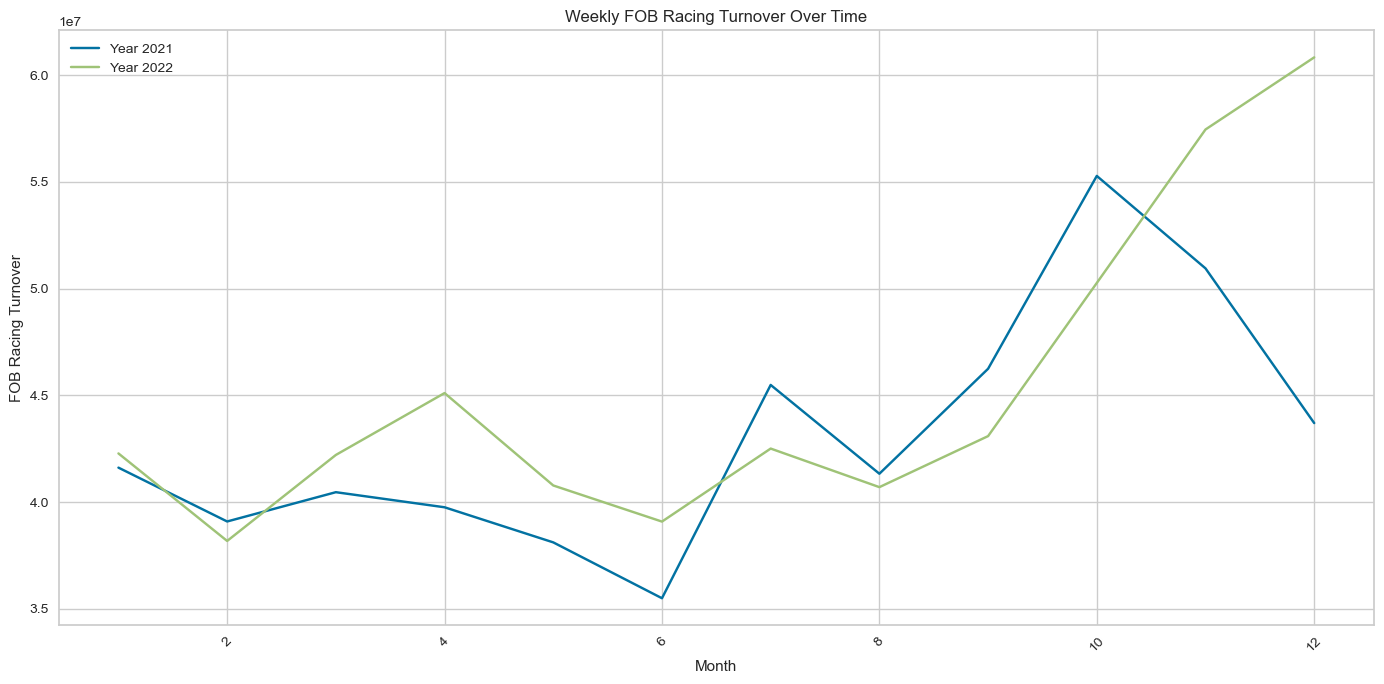

In [69]:
fob_racing_turnover_weekly = df.groupby(['Year', 'Month'])['FOB_RACING_TURNOVER'].sum()

plt.figure(figsize=(14, 7))

for year in sorted(df['Year'].unique()):
    if year in fob_racing_turnover_weekly.index.levels[0]:
        plt.plot(fob_racing_turnover_weekly[year], label=f'Year {year}')

plt.title('Weekly FOB Racing Turnover Over Time')
plt.xlabel('Month')
plt.ylabel('FOB Racing Turnover')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

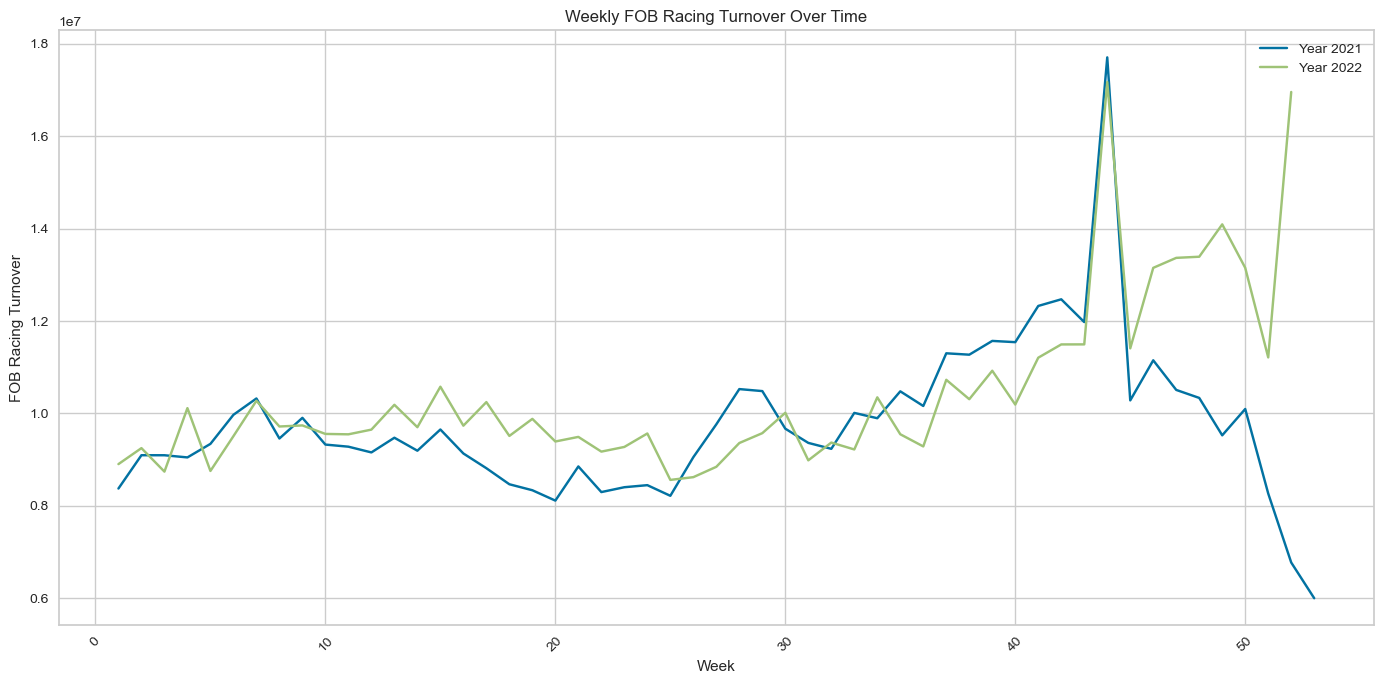

In [70]:
fob_racing_turnover_weekly = df.groupby(['Year', 'Week'])['FOB_RACING_TURNOVER'].sum()

plt.figure(figsize=(14, 7))
for year in df['Year'].unique():
    plt.plot(fob_racing_turnover_weekly[year].index, fob_racing_turnover_weekly[year].values, label=f'Year {year}')

plt.title('Weekly FOB Racing Turnover Over Time')
plt.xlabel('Week')
plt.ylabel('FOB Racing Turnover')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

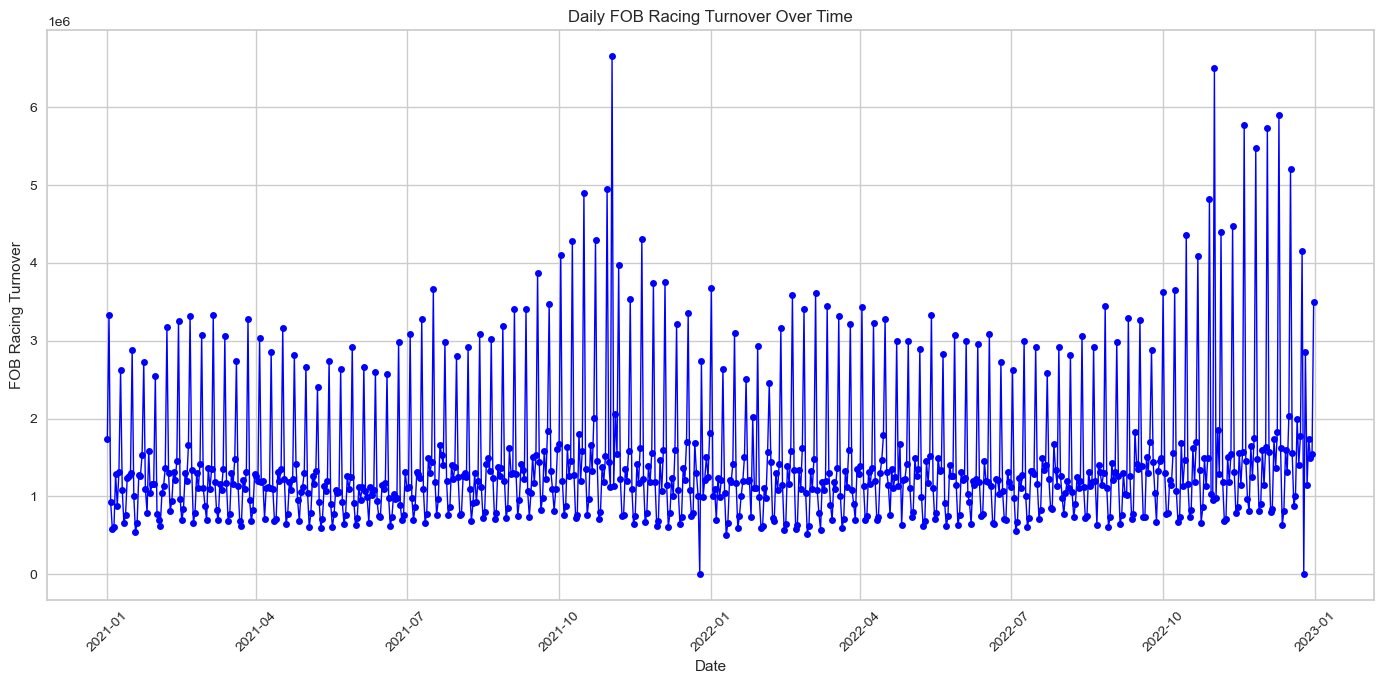

In [71]:
fob_racing_turnover_daily = df.groupby('DATE_DIM')['FOB_RACING_TURNOVER'].sum()

plt.figure(figsize=(14, 7))
plt.plot(fob_racing_turnover_daily.index, fob_racing_turnover_daily.values, color='blue', marker='o', linestyle='-', linewidth=1, markersize=5)
plt.title('Daily FOB Racing Turnover Over Time')
plt.xlabel('Date')
plt.ylabel('FOB Racing Turnover')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### 3.2.2 Total FOB_SPORT_TURNOVER vs DIM_DATE

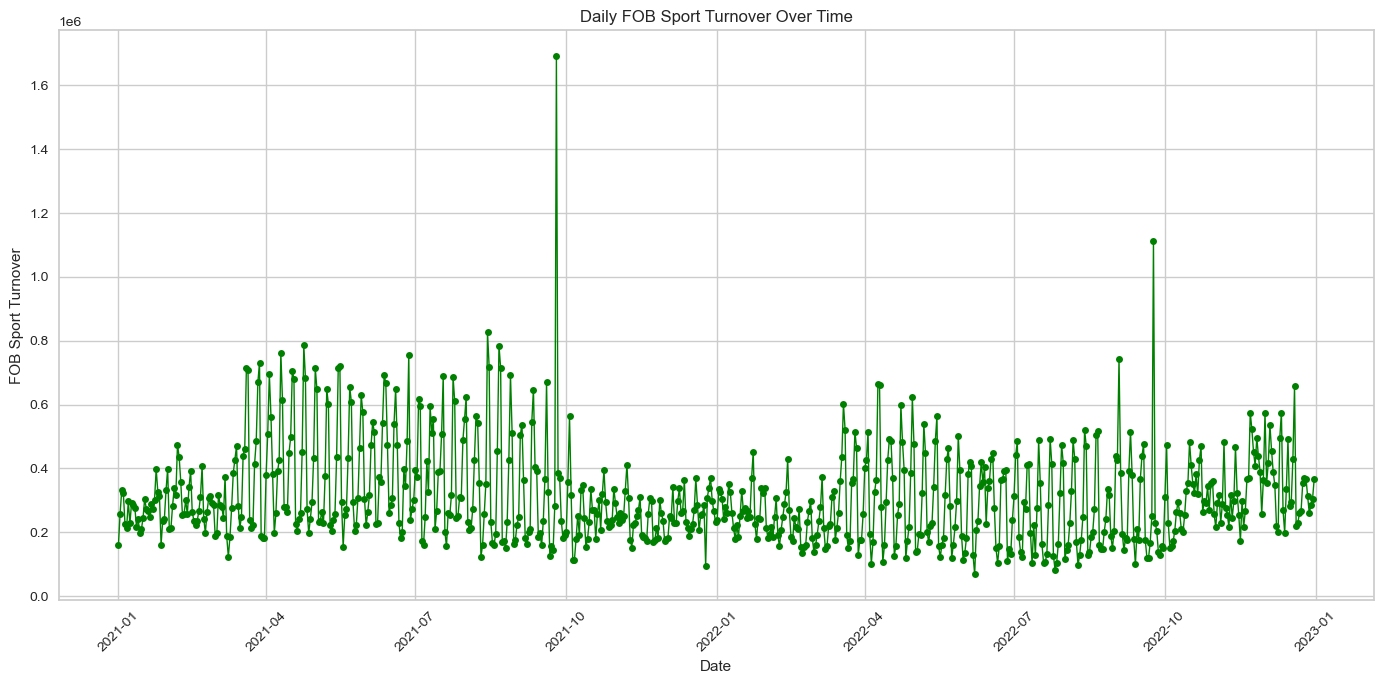

In [72]:
fob_sport_turnover_daily = df.groupby('DATE_DIM')['FOB_SPORT_TURNOVER'].sum()

plt.figure(figsize=(14, 7))
plt.plot(fob_sport_turnover_daily.index, fob_sport_turnover_daily.values, color='green', marker='o', linestyle='-', linewidth=1, markersize=5)
plt.title('Daily FOB Sport Turnover Over Time')
plt.xlabel('Date')
plt.ylabel('FOB Sport Turnover')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### 3.2.3 Total PARI_RACING_TURNOVER vs DIM_DATE

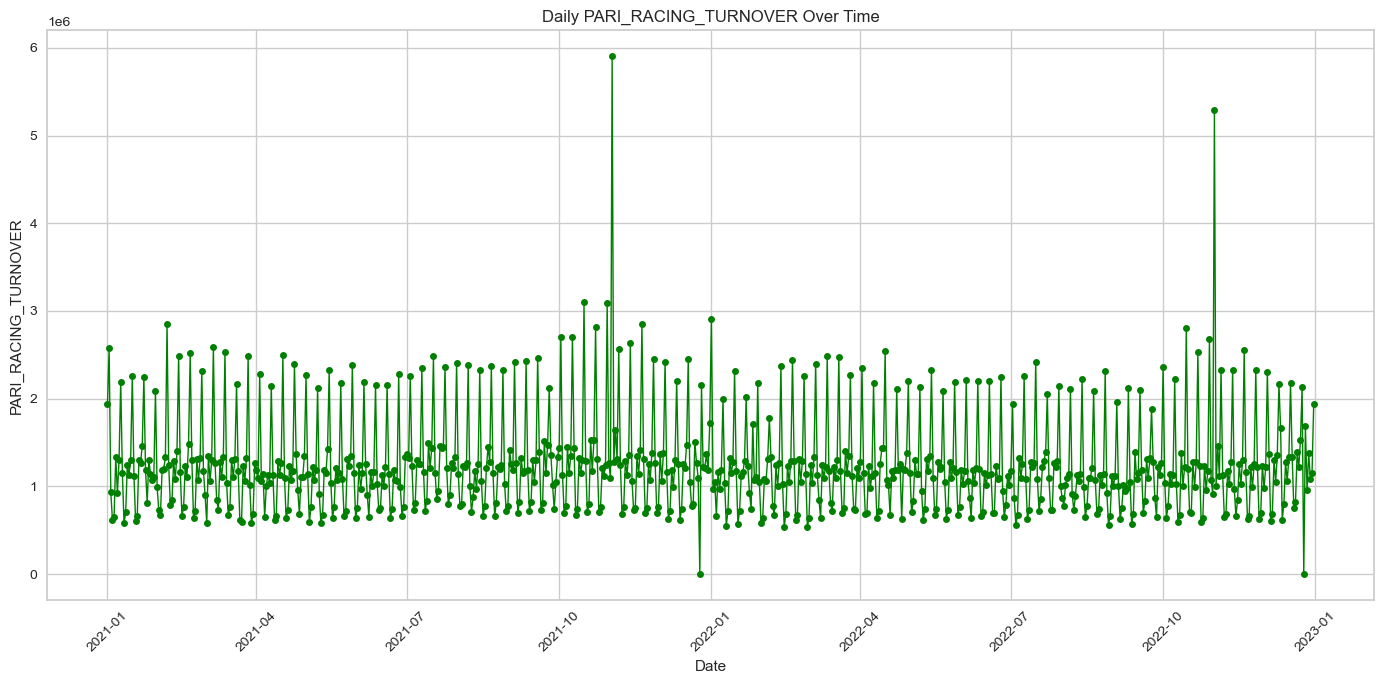

In [73]:
PARI_RACING_TURNOVER_daily = df.groupby('DATE_DIM')['PARI_RACING_TURNOVER'].sum()

plt.figure(figsize=(14, 7))
plt.plot(PARI_RACING_TURNOVER_daily.index, PARI_RACING_TURNOVER_daily.values, color='green', marker='o', linestyle='-', linewidth=1, markersize=5)
plt.title('Daily PARI_RACING_TURNOVER Over Time')
plt.xlabel('Date')
plt.ylabel('PARI_RACING_TURNOVER')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### 3.2.4 Total PARI_SPORT_TURNOVER vs DIM_DATE

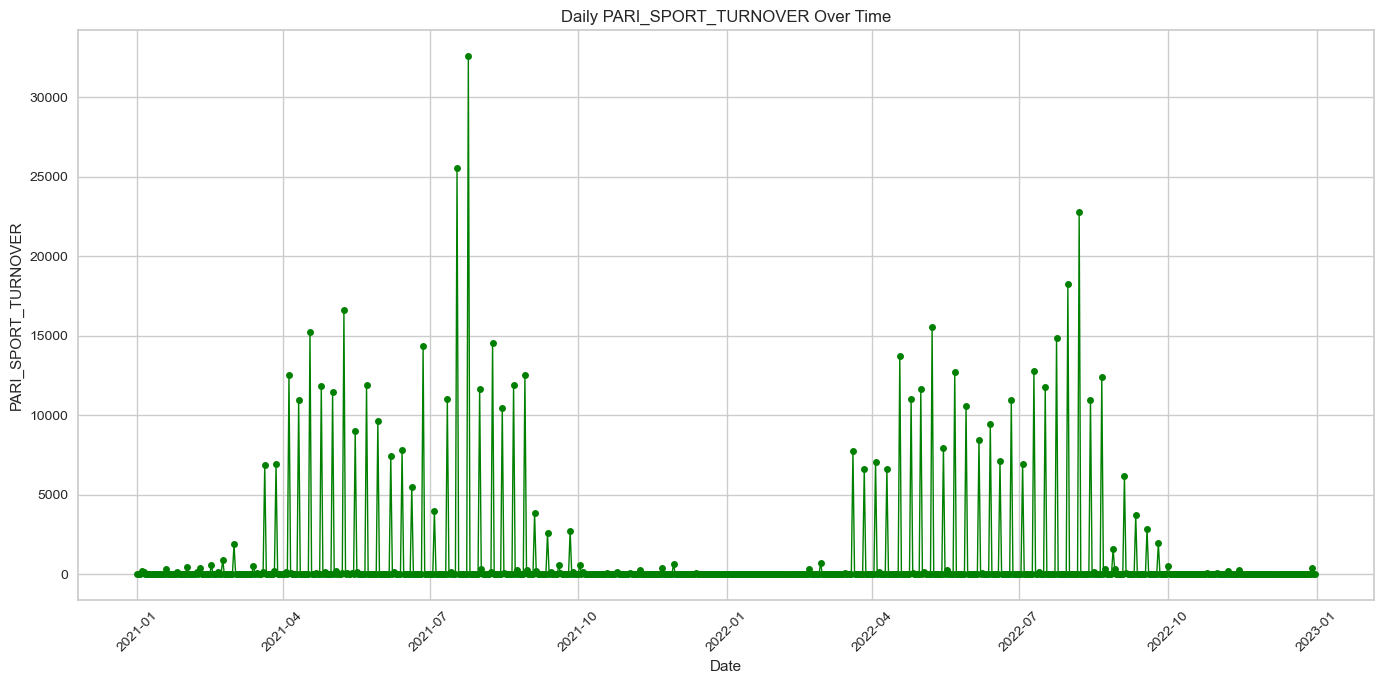

In [74]:
PARI_SPORT_TURNOVER_daily = df.groupby('DATE_DIM')['PARI_SPORT_TURNOVER'].sum()

plt.figure(figsize=(14, 7))
plt.plot(PARI_SPORT_TURNOVER_daily.index, PARI_SPORT_TURNOVER_daily.values, color='green', marker='o', linestyle='-', linewidth=1, markersize=5)
plt.title('Daily PARI_SPORT_TURNOVER Over Time')
plt.xlabel('Date')
plt.ylabel('PARI_SPORT_TURNOVER')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### 3.2.5 TOTAL_TURNOVER vs DIM_DATE

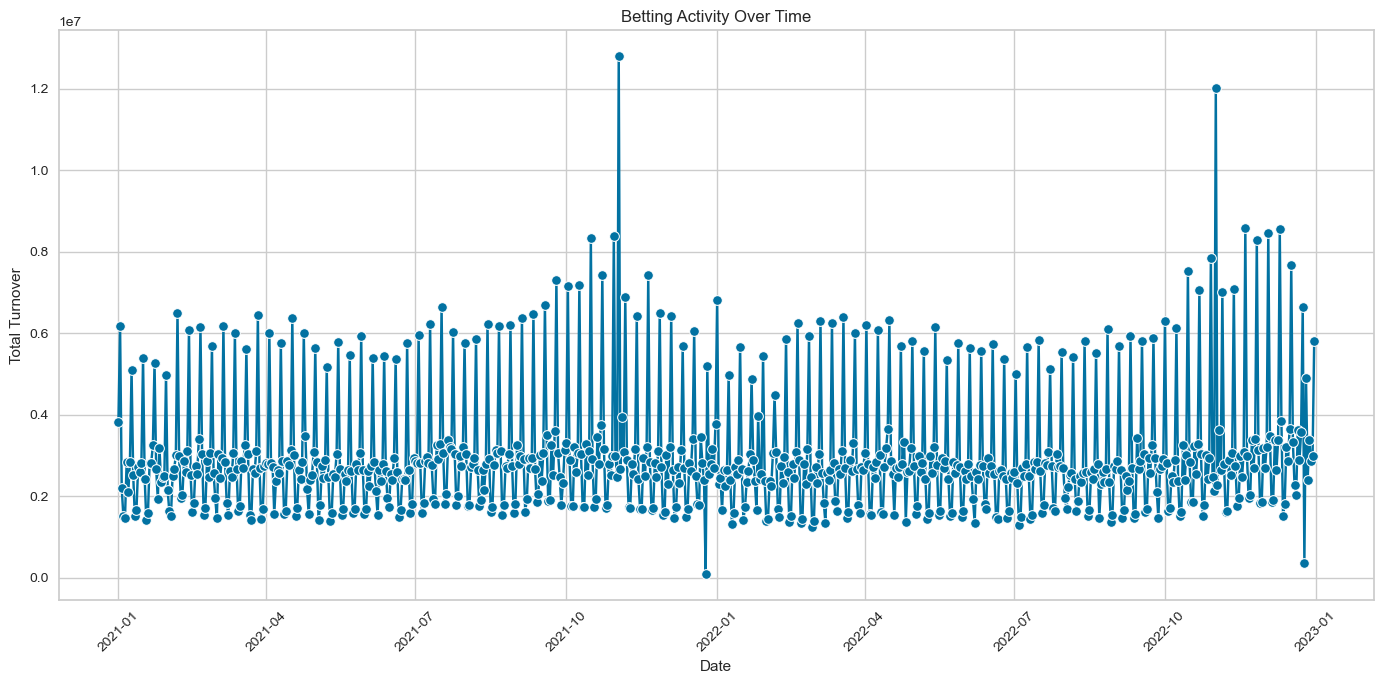

In [75]:
daily_turnover = df.groupby('DATE_DIM')['TOTAL_TURNOVER'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x='DATE_DIM', y='TOTAL_TURNOVER', data=daily_turnover, marker='o')
plt.title('Betting Activity Over Time')
plt.xlabel('Date')
plt.ylabel('Total Turnover')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3.2.6 Total DIVIDENDS_PAID vs DIM_DATE

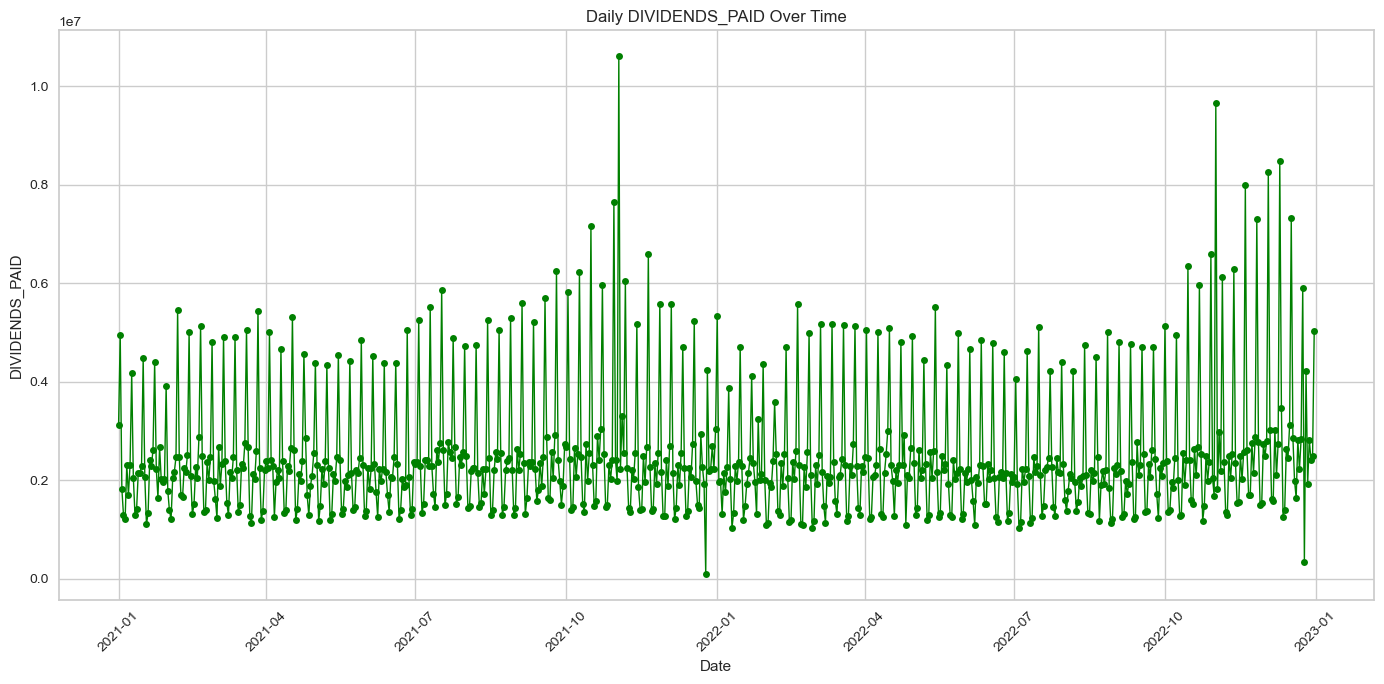

In [76]:
DIVIDENDS_PAID_daily = df.groupby('DATE_DIM')['DIVIDENDS_PAID'].sum()

plt.figure(figsize=(14, 7))
plt.plot(DIVIDENDS_PAID_daily.index, DIVIDENDS_PAID_daily.values, color='green', marker='o', linestyle='-', linewidth=1, markersize=5)
plt.title('Daily DIVIDENDS_PAID Over Time')
plt.xlabel('Date')
plt.ylabel('DIVIDENDS_PAID')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### 3.2.7 Total GROSS_MARGIN vs DIM_DATE

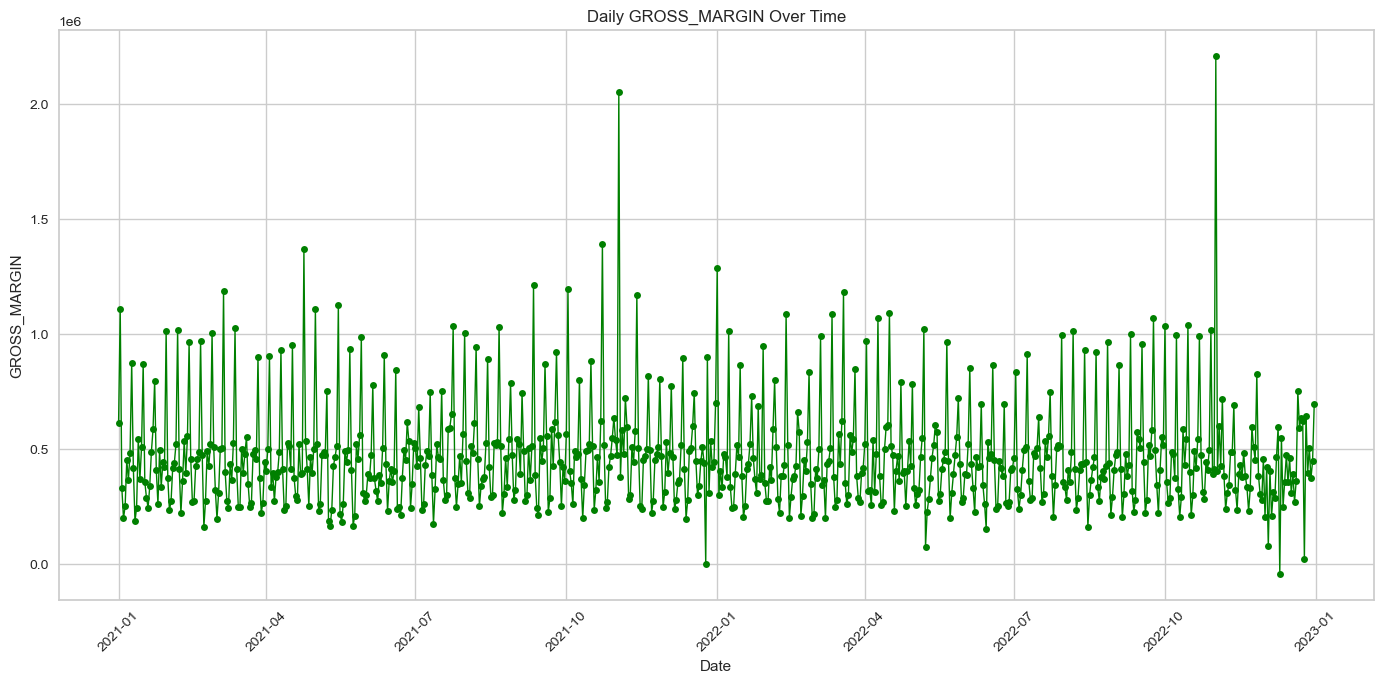

In [77]:
GROSS_MARGIN_daily = df.groupby('DATE_DIM')['GROSS_MARGIN'].sum()

plt.figure(figsize=(14, 7))
plt.plot(GROSS_MARGIN_daily.index, GROSS_MARGIN_daily.values, color='green', marker='o', linestyle='-', linewidth=1, markersize=5)
plt.title('Daily GROSS_MARGIN Over Time')
plt.xlabel('Date')
plt.ylabel('GROSS_MARGIN')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

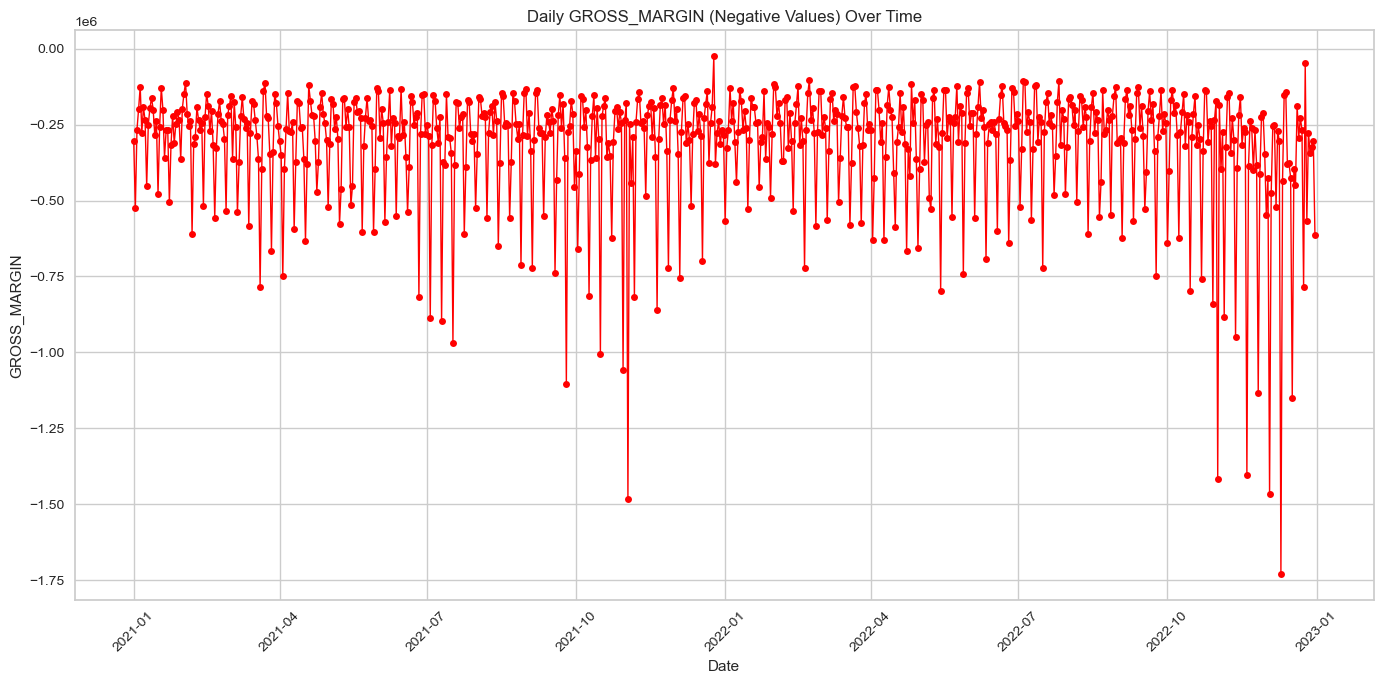

In [78]:
df_negative_gross_margin = df[df['GROSS_MARGIN'] < 0]

GROSS_MARGIN_daily_negative = df_negative_gross_margin.groupby('DATE_DIM')['GROSS_MARGIN'].sum()

plt.figure(figsize=(14, 7))
plt.plot(GROSS_MARGIN_daily_negative.index, GROSS_MARGIN_daily_negative.values, color='red', marker='o', linestyle='-', linewidth=1, markersize=5)
plt.title('Daily GROSS_MARGIN (Negative Values) Over Time')
plt.xlabel('Date')
plt.ylabel('GROSS_MARGIN')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

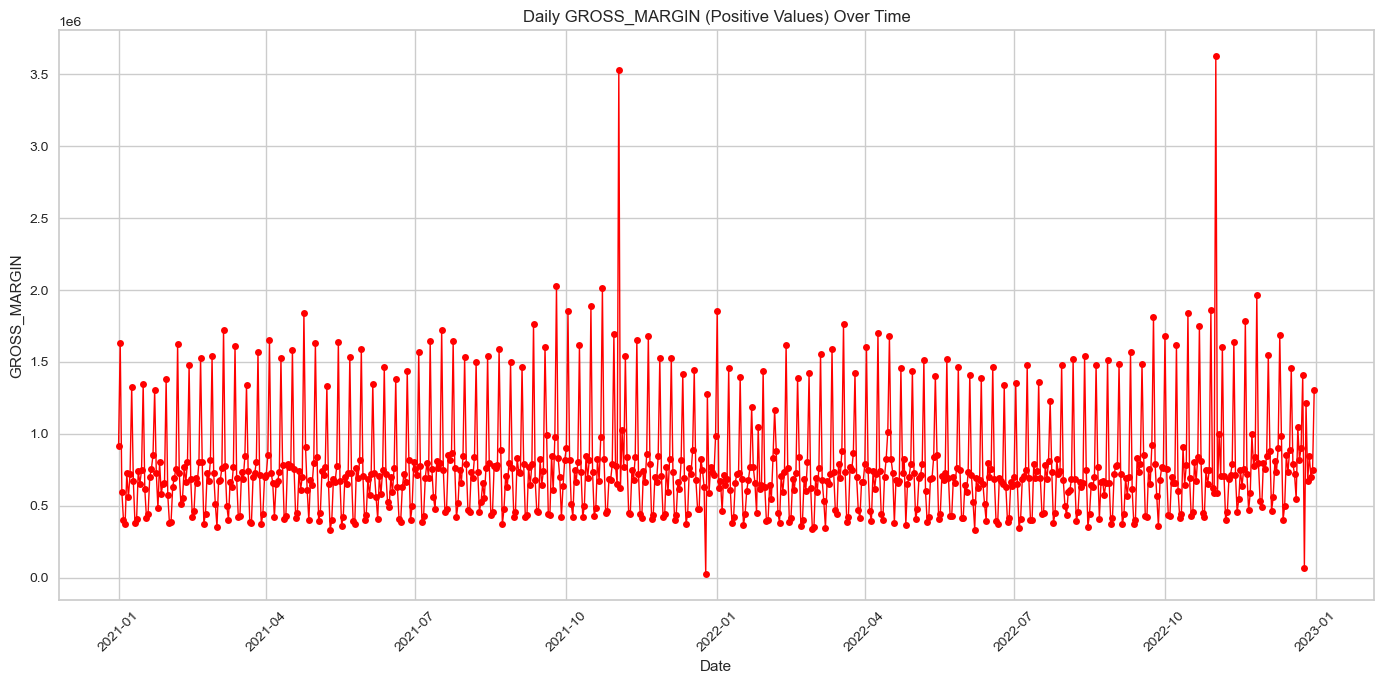

In [79]:
df_positive_gross_margin = df[df['GROSS_MARGIN'] > 0]

GROSS_MARGIN_daily_positive = df_positive_gross_margin.groupby('DATE_DIM')['GROSS_MARGIN'].sum()

plt.figure(figsize=(14, 7))
plt.plot(GROSS_MARGIN_daily_positive.index, GROSS_MARGIN_daily_positive.values, color='red', marker='o', linestyle='-', linewidth=1, markersize=5)
plt.title('Daily GROSS_MARGIN (Positive Values) Over Time')
plt.xlabel('Date')
plt.ylabel('GROSS_MARGIN')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### 3.2.8 Total TICKETS vs DIM_DATE

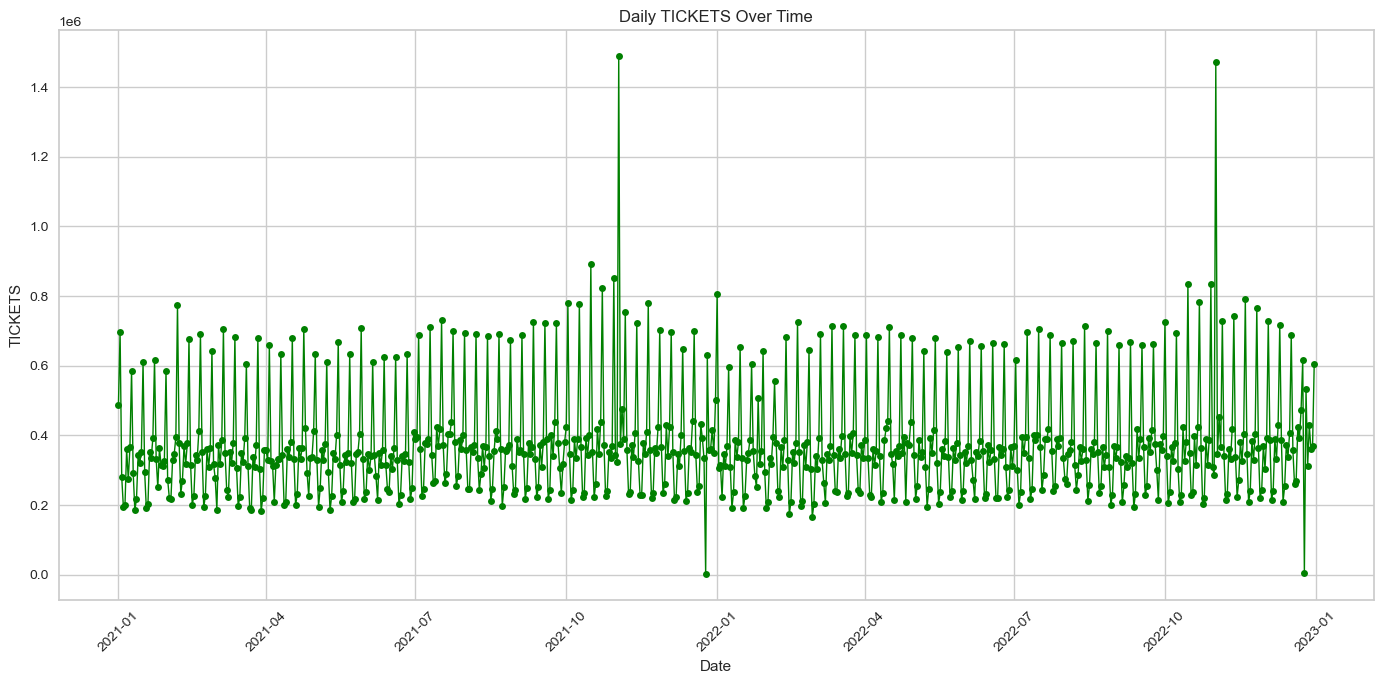

In [80]:
TICKETS_daily = df.groupby('DATE_DIM')['TICKETS'].sum()

plt.figure(figsize=(14, 7))
plt.plot(TICKETS_daily.index, TICKETS_daily.values, color='green', marker='o', linestyle='-', linewidth=1, markersize=5)
plt.title('Daily TICKETS Over Time')
plt.xlabel('Date')
plt.ylabel('TICKETS')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### 3.2.9 Total BET_ACCOUNT_NUM_HASH DAY vs DIM_DATE

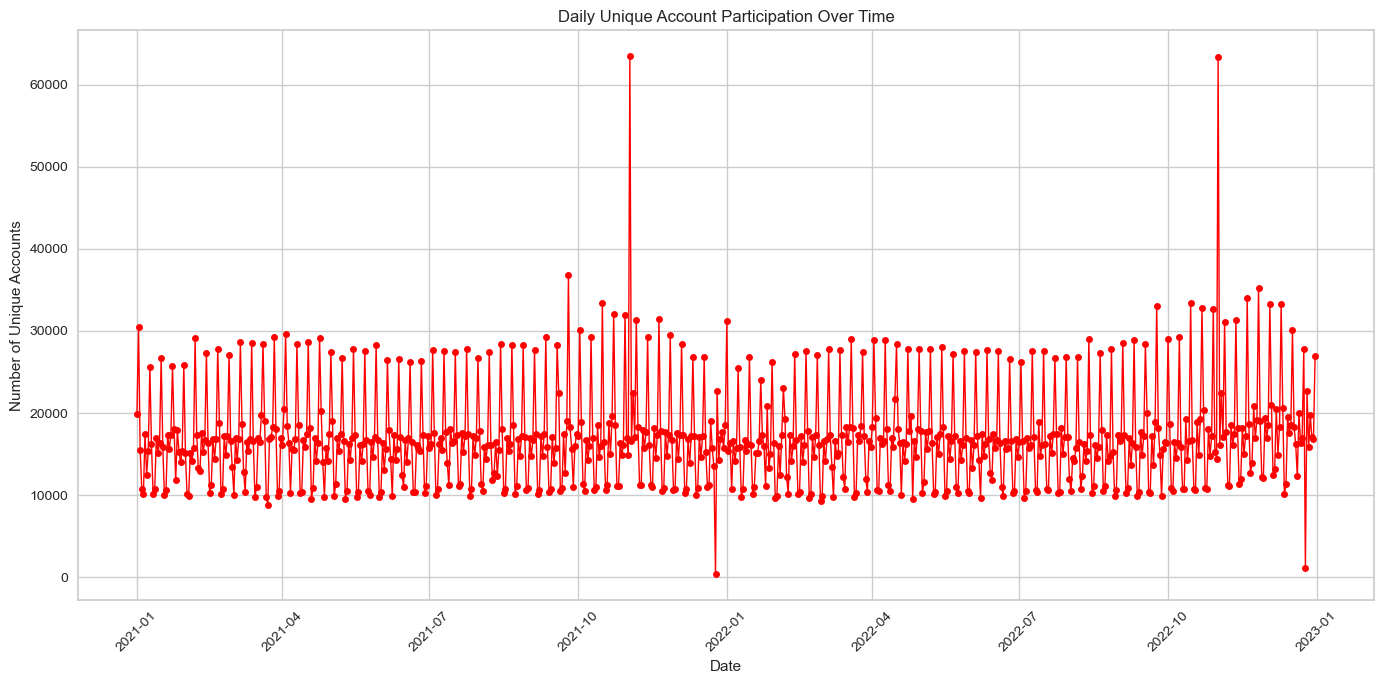

In [81]:
daily_account_participation = df.groupby('DATE_DIM')['BET_ACCOUNT_NUM_HASH'].nunique()

plt.figure(figsize=(14, 7))
plt.plot(daily_account_participation.index, daily_account_participation.values, color='red', marker='o', linestyle='-', linewidth=1, markersize=5)
plt.title('Daily Unique Account Participation Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Unique Accounts')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## 3.4 Decomposition Analysis: 

In [74]:
import statsmodels.api as sm
# Thực hiện phân tích phân rã
decomposition = sm.tsa.seasonal_decompose(df['TICKETS'], model='additive')

# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df['TICKETS'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

## 3.5 Dynamic Time Warping (DTW)

In [ ]:
!pip install fastdtw
from fastdtw import fastdtw
import numpy as np

# Chuyển đổi hai chuỗi thời gian thành mảng numpy
time_series_1 = np.array(daily_account_participation.values)
time_series_2 = np.array(TICKETS_daily.values)

# Tính toán DTW giữa hai chuỗi thời gian
distance, path = fastdtw(time_series_1, time_series_2)

# In ra khoảng cách tính được
print("Dynamic Time Warping Distance:", distance)

# IV. DATA STANDARDIZING & NORMALIZATION

Sẽ dùng label encoder, và min max scaler

# V. TRAIN - VALID - TEST SPLIT

CHia dữ liệu ra 9:0,5:0,5

# VI. FORECASTING

DÙNG DEEP LEARNING ĐỂ LÀM VÀ DỰ ĐOÁN

# VII. EVALUATION